<a href="https://colab.research.google.com/github/marfappv/predictive-analytics/blob/main/Google-Collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">MSIN0097: Predictive Analytics</h1>
<br><br>
<h1 align="center">What is the optimal number of playlists a song should be added to, to reach its potential maximum stream length?</h1>
<br><br>
<h1 align="center">24th March</h1>
<h1 align="center">Word Count: 2000</h1>
<br><br>
<h3 align="left"> Google Colab link for the Notebook file: https://colab.research.google.com/drive/1Fe94BV082O_hazYx3CVcBVuFrJ3gCbdd?usp=sharing </h3>


# Table of Contents

* [Chapter 1](#chapter1): Framing the problem

* [Chapter 2](#chapter2): Data cleaning
    * [2.1](#2_1): Dataframe sorting
    * [2.2](#2_2): Dealing with duplicates and missing values
 
* [Chapter 3](#chapter3): Exploratory data analysis

* [Chapter 4](#chapter4): Preprocessing
    * [4.1](#4_1): Feature engineering
    * [4.2](#4_2): Label encoding
    * [4.3](#4_3): Feature scaling
    * [4.4](#4_4): Data splitting

* [Chapter 5](#chapter5): Model selection and training
    * [5.1](#5_1): Logistic regression
    * [5.2](#5_2): Decision tree classifier
    * [5.3](#5_3): Random forest classifier
    * [5.4](#5_4): XGBoost
    * [5.5](#5_5): SVM
    * [5.6](#5_6): Models comparison

* [Chapter 6](#chapter6): Cross-validation

* [Chapter 7](#chapter7): Fine-tuning
    * [7.1](#7_1): Grid search
    * [7.2](#7_2): Voting classifier
    * [7.3](#7_3): Feature importance

* [Chapter 8](#chapter8): Performance evaluation
    * [8.1](#8_1): Confusion matrix
    * [8.2](#8_2): ROC curve
    * [8.3](#8_3): Precision-recall curve

* [Chapter 9](#chapter9): Conclusion
* [Chapter 10](#chapter10): References

# Report

## Notebook Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Essentials
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
from pandas import Series, DataFrame
from pandas.api.types import CategoricalDtype
pd.options.display.max_columns = None
import numpy as np; np.random.seed(1)
import random

#Image creation
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import StrMethodFormatter
import matplotlib.patches as mpatches
from matplotlib import pyplot
import plotly.express as px
import plotly.graph_objects as go

#Image display
from IPython.display import Image as image
from IPython.display import display

#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.base import clone
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from pprint import pprint

#Metrics of accuracy
from numpy import mean
from numpy import std
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.metrics import roc_auc_score

#Other
from nbformat import current
import itertools
from itertools import cycle
import io
import os
import sys

/usr/local/lib/python3.7/dist-packages/nbformat/current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)


## Chapter 1: <a class="anchor" id="chapter1"></a> Framing the problem

Spotify is one of the biggest music streaming platforms in the world which connects established and up-and-coming artists with listeners worldwide. Spotify playlists are one of the key channels connecting the listeners with music they want to hear. Inclusion in popular playlists will immediately expose an artist to a wider audience, in turn leading to higher streaming levels. Subsequently, playlists are an important strategic asset for artists. The inclusion of an artist in a playlist can be the differentiating factor between success and failure. 

The purpose of this project is to identify the most impactful metrics that maximise an artists’ chances of success ceteris paribus.

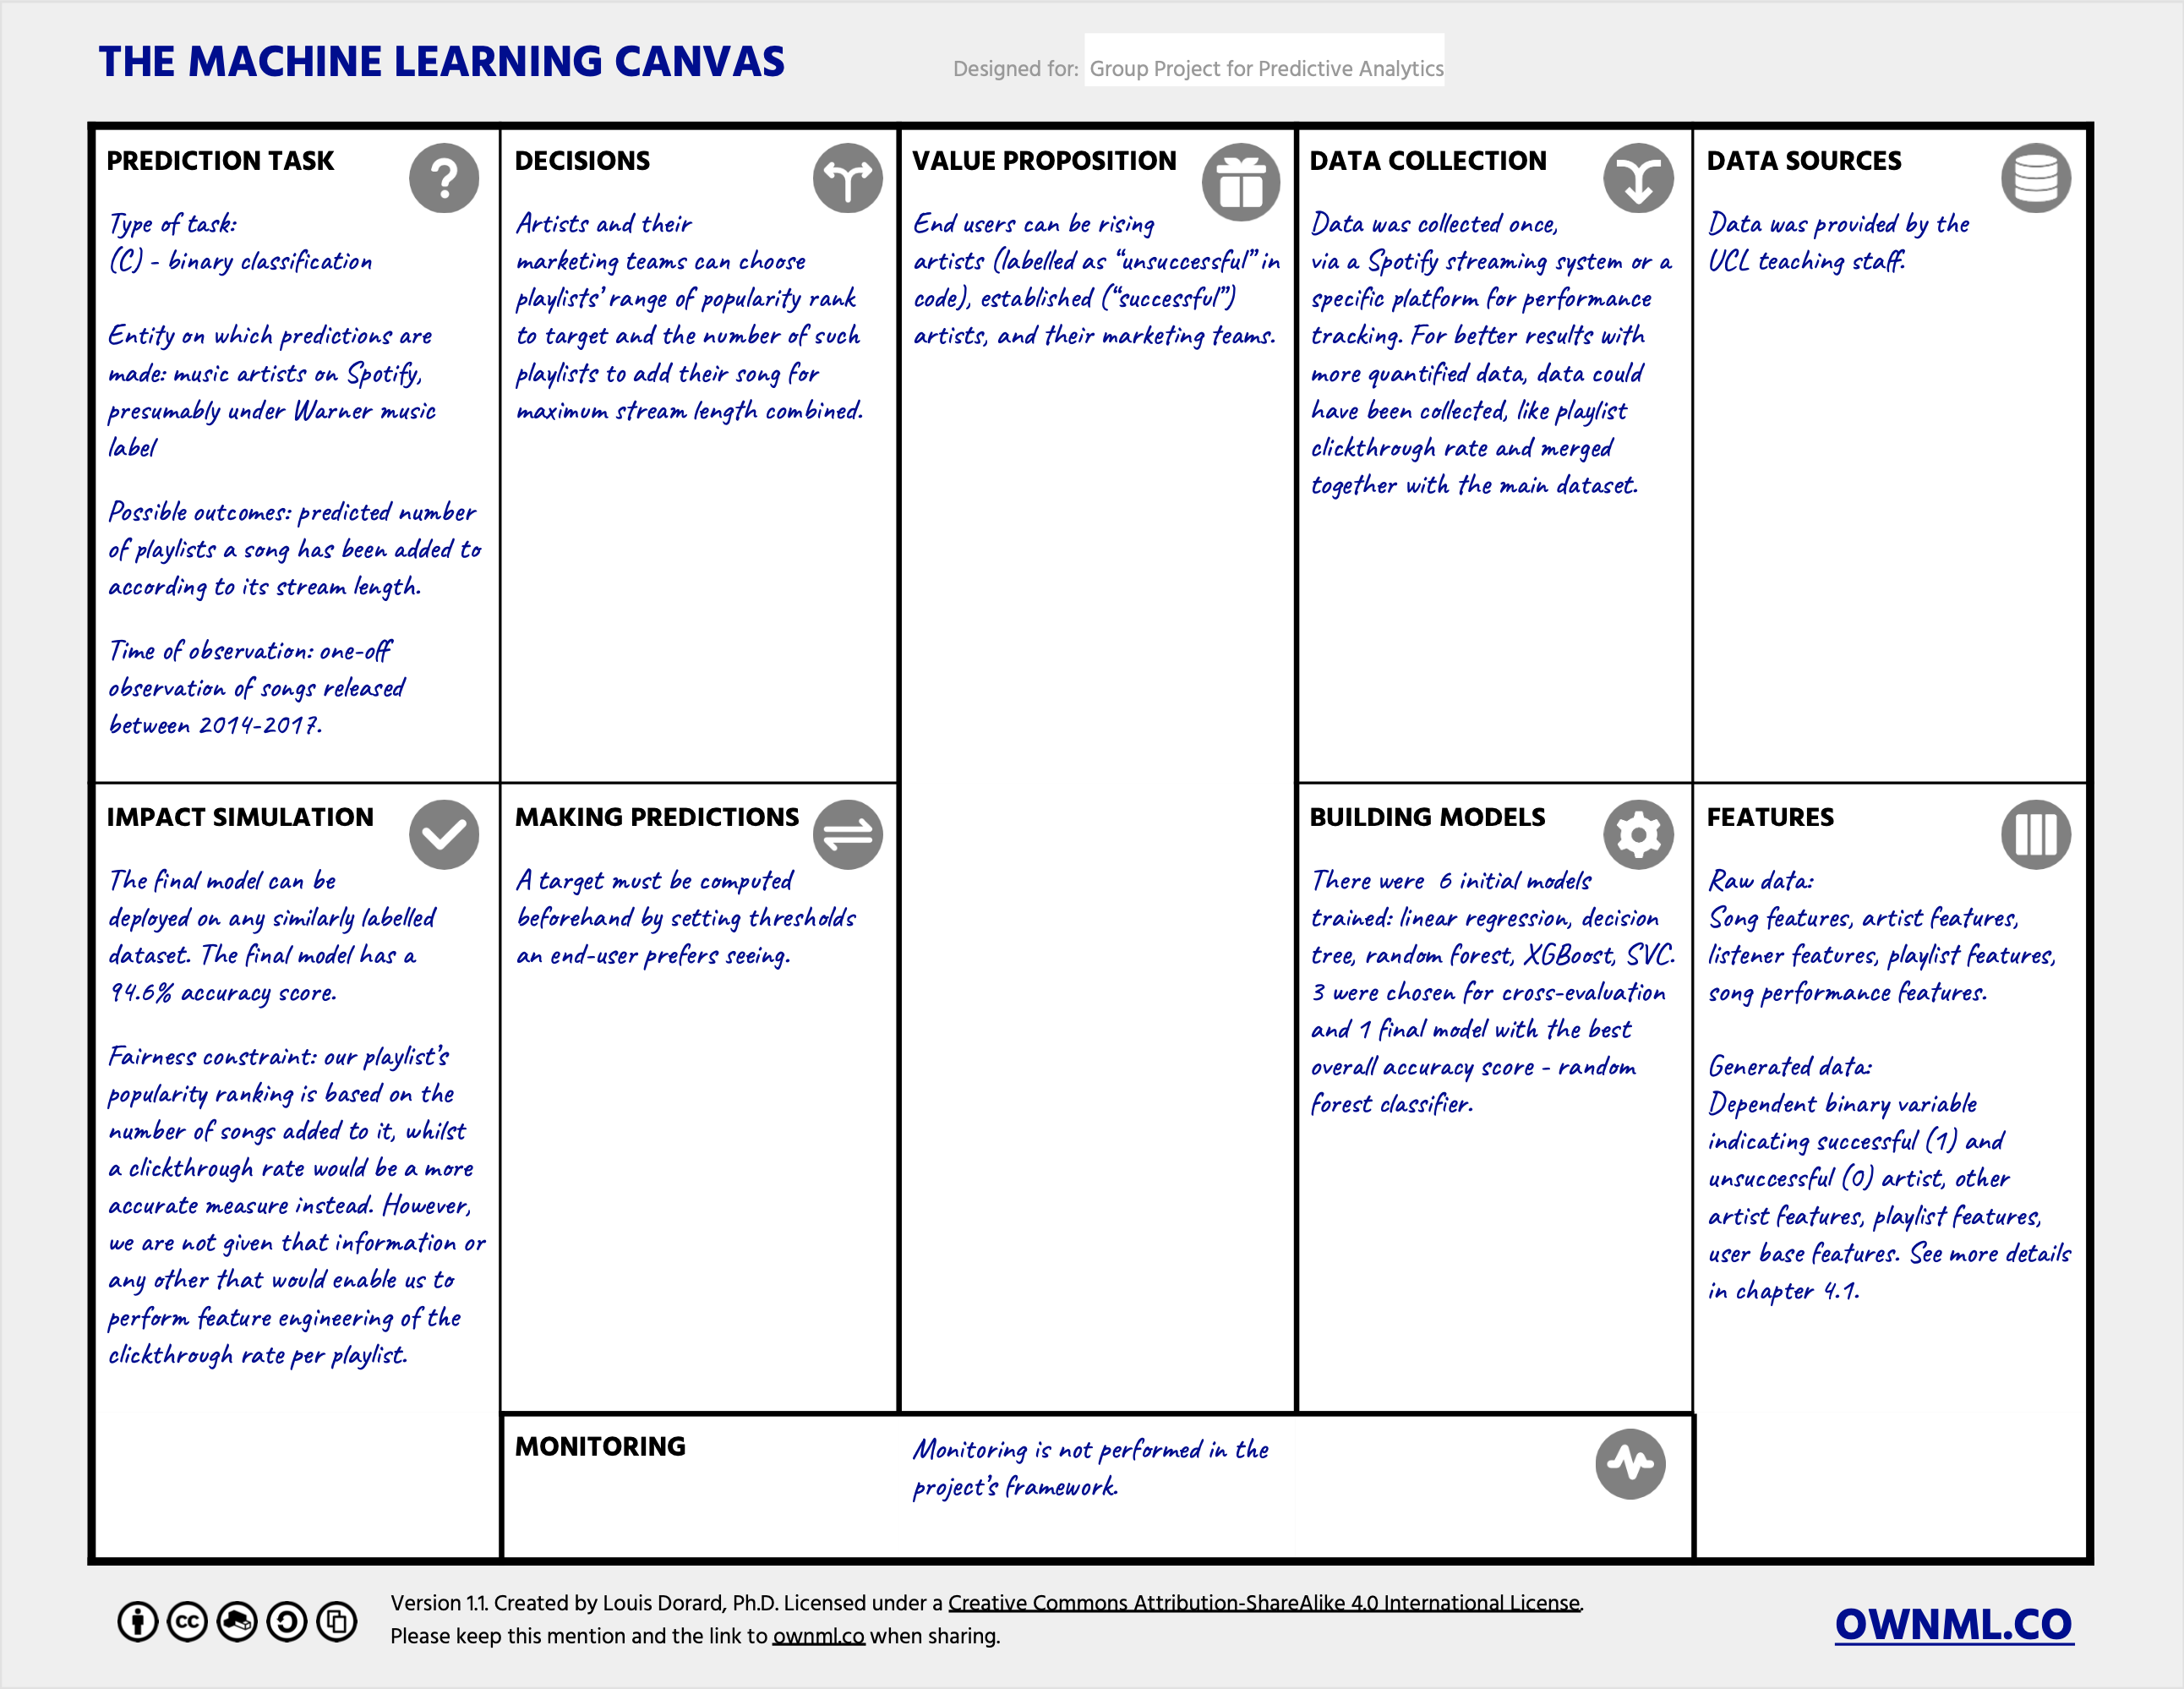

In [ ]:
display(image(filename='/content/drive/MyDrive/Colab Notebooks/ml_canvas.png'))

## Chapter 2: <a class="anchor" id="chapter2"></a> Data cleaning

### 2.1  <a class="anchor" id="2_1"></a> Dataframe sorting

#### 2.1.1  <a class="anchor" id="2_1_1"></a> Main dataframe

The main dataset was composed of 3.8M rows and 44 columns, where each row represents an instance of a track being listened to by a user. For example, this contains information on the track name, the artist name, how the track was accessed, and what user accessed it. The region_code column was dealt with as follows: the try-except method was used to convert strings of the column to an integer type, and for the rare countries where the conversion did not succeed (due to code containing letters),  they were converted manually to UN codes, so that country codes were consistent throughout. Columns that were deemed irrelevant for future analysis were dropped.

In [ ]:
# Read the CSV file
main_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cleaned_data.csv", on_bad_lines='skip', index_col = 0, encoding='ISO-8859-1')
main_df.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0.1,Unnamed: 0.1.1,day,log_time,mobile,track_id,isrc,upc,artist_name,track_name,album_name,customer_id,postal_code,access,country_code,gender,birth_year,filename,region_code,referral_code,partner_name,financial_product,user_product_type,offline_timestamp,stream_length,stream_cached,stream_source,stream_source_uri,stream_device,stream_os,track_uri,track_artists,source,DateTime,hour,minute,week,month,year,date,weekday,weekday_name,playlist_id,playlist_name
0,9,"('small_artists_2016.csv', 9)",10,20160510T12:15:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,6c022a8376c10aae37abb839eb7625fe,NE,free,GB,male,1968.0,streams_20160510_GB.004.gz,GB-DUR,NaN,NaN,NaN,ad,NaN,277.0,NaN,album,NaN,mobile,Android,spotify:track:4m1opmaYT9zk5OP7IHUb9R,Sturgill Simpson,NaN,2016-05-10 12:15:00,12,15,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN
1,19,"('small_artists_2016.csv', 19)",10,20160510T12:15:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,6c022a8376c10aae37abb839eb7625fe,NE,free,GB,male,1968.0,streams_20160510_GB.004.gz,GB-DUR,NaN,NaN,NaN,ad,NaN,53.0,NaN,album,NaN,mobile,Android,spotify:track:4m1opmaYT9zk5OP7IHUb9R,Sturgill Simpson,NaN,2016-05-10 12:15:00,12,15,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN
2,29,"('small_artists_2016.csv', 29)",10,20160510T14:00:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,352292382ff3ee0cfd3b73b94ea0ff8f,1,premium,GB,male,1995.0,streams_20160510_GB.002.gz,GB-ESS,NaN,NaN,student,paid,NaN,326.0,NaN,collection,NaN,mobile,Android,spotify:track:4m1opmaYT9zk5OP7IHUb9R,Sturgill Simpson,NaN,2016-05-10 14:00:00,14,0,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN
3,39,"('small_artists_2016.csv', 39)",10,20160510T10:45:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,c3f2b54e76696ed491d9d8f964c97774,MK,premium,GB,male,1992.0,streams_20160510_GB.007.gz,GB-HRT,NaN,NaN,student,paid,NaN,330.0,NaN,collection,NaN,tablet,iOS,spotify:track:4m1opmaYT9zk5OP7IHUb9R,Sturgill Simpson,NaN,2016-05-10 10:45:00,10,45,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN
4,49,"('small_artists_2016.csv', 49)",10,20160510T10:15:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,6a06a9bbe042c73e8f1a3596ec321636,KT,premium,GB,male,1979.0,streams_20160510_GB.004.gz,GB-LND,NaN,NaN,NaN,paid,NaN,90.0,NaN,collection,NaN,mobile,iOS,spotify:track:4m1opmaYT9zk5OP7IHUb9R,Sturgill Simpson,NaN,2016-05-10 10:15:00,10,15,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN


In [ ]:
# Descriptive statistics of the transposed table
main_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0.1,3805499.0,1.902750e+07,1.098553e+07,9.000000e+00,9.513754e+06,1.902750e+07,2.854124e+07,3.805499e+07
day,3805499.0,1.000000e+01,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01
upc,3805499.0,2.389062e+11,2.757391e+11,1.686134e+10,7.567991e+10,1.902958e+11,1.902960e+11,5.414940e+12
birth_year,3795478.0,1.990107e+03,1.068282e+01,1.867000e+03,1.987000e+03,1.993000e+03,1.997000e+03,2.017000e+03
referral_code,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
offline_timestamp,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stream_length,3805499.0,1.891587e+02,6.105546e+01,3.000000e+01,1.720000e+02,2.000000e+02,2.240000e+02,9.000000e+02
stream_cached,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hour,3805499.0,1.373665e+01,5.400456e+00,0.000000e+00,1.000000e+01,1.400000e+01,1.800000e+01,2.300000e+01


In [ ]:
# Show number of all existing data types in the dataframe
print(main_df.dtypes.astype(str).value_counts())

object     28
int64       8
float64     7
bool        1
dtype: int64


In [ ]:
# Removing blanks in columns name:
for col in main_df.columns:
    col1 = col.replace(' ','')
    data = main_df.rename(columns={col:col1})
main_df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0.1.1', 'day', 'log_time', 'mobile',
       'track_id', 'isrc', 'upc', 'artist_name', 'track_name', 'album_name',
       'customer_id', 'postal_code', 'access', 'country_code', 'gender',
       'birth_year', 'filename', 'region_code', 'referral_code',
       'partner_name', 'financial_product', 'user_product_type',
       'offline_timestamp', 'stream_length', 'stream_cached', 'stream_source',
       'stream_source_uri', 'stream_device', 'stream_os', 'track_uri',
       'track_artists', 'source', 'DateTime', 'hour', 'minute', 'week',
       'month', 'year', 'date', 'weekday', 'weekday_name', 'playlist_id',
       'playlist_name'],
      dtype='object')

In [ ]:
# Check the unique values 
main_df.year.unique()

array([2016, 2014, 2015, 2017])

In [ ]:
# Check the unique values 
main_df.stream_os.unique()

array(['Android', 'iOS', 'Windows', 'Mac', 'other', 'Browser',
       'Windows Phone', 'Linux', 'Blackberry', 'Wine'], dtype=object)

In [ ]:
# Check the unique values 
main_df.stream_device.unique()

array(['mobile', 'tablet', 'desktop'], dtype=object)

In [ ]:
# Check the unique values 
main_df.user_product_type.unique()

array(['ad', 'paid', 'partner', nan, 'trial', 'deleted'], dtype=object)

In [ ]:
# Check the unique values 
main_df.source.unique()

array([nan])

In [ ]:
print("Number of unique artists in \"artist_name\" column is " + str(len(main_df.artist_name.unique())))

Number of unique artists in "artist_name" column is 661


In [ ]:
print("Number of unique artists in \"track_artists\" column is " +str(len(main_df.track_artists.unique())))

Number of unique artists in "track_artists" column is 825


In [ ]:
# Checking if the two columns are the same
data_compare = [main_df['track_artists'], main_df['artist_name']]
df_compare = pd.concat(data_compare, axis=1)
df_compare['new'] = (df_compare['track_artists'] == df_compare['artist_name']) 

# Printing the dataframe
df_compare.head()
df_compare[df_compare['new'] == False]

,track_artists,artist_name,new
0,Sturgill Simpson,Sturgill Simpson,True
1,Sturgill Simpson,Sturgill Simpson,True
2,Sturgill Simpson,Sturgill Simpson,True
3,Sturgill Simpson,Sturgill Simpson,True
4,Sturgill Simpson,Sturgill Simpson,True


,track_artists,artist_name,new
37,DelafÃ©,Delafe,False
88,"Ty Taylor, Vinyl on HBO",Vinyl on HBO,False
89,"Ty Taylor, Vinyl on HBO",Vinyl on HBO,False
90,"Ty Taylor, Vinyl on HBO",Vinyl on HBO,False
91,"Ty Taylor, Vinyl on HBO",Vinyl on HBO,False
...,...,...,...
3227577,Sweat,SWEAT,False
3227578,Sweat,SWEAT,False
3227579,Sweat,SWEAT,False
3227580,Sweat,SWEAT,False


What is our conclusion from the comparison above?

In [ ]:
# Check the unique values 
main_df.region_code.unique()

array(['GB-DUR', 'GB-ESS', 'GB-HRT', 'GB-LND', 'GB-GLS', 'GB-EDH', nan,
       'GB-RDG', 'GB-COV', 'GB-NFK', 'GB-MIK', 'GB-ABE', 'GB-SOM',
       'GB-MON', 'GB-BFS', 'GB-GLG', 'GB-SHF', 'GB-WAR', 'GB-CAM',
       'GB-FIF', 'GB-BST', 'GB-EAL', 'GB-LAN', 'GB-ERY', 'GB-KIR',
       'GB-LDS', 'GB-WSX', 'GB-LEC', 'GB-RCH', 'GB-BEX', 'GB-BKM',
       'GB-SND', 'GB-PLY', 'GB-LIV', 'GB-WIL', 'GB-KTT', 'GB-LCE',
       'GB-CHE', 'GB-DOR', 'GB-NBL', 'GB-BIR', 'GB-ROT', 'GB-DER',
       'GB-THR', 'GB-MAN', 'GB-CBF', 'GB-CMA', 'GB-MRT', 'GB-YOR',
       'GB-SFK', 'GB-SOS', 'GB-SRY', 'GB-FAL', 'GB-BGE', 'GB-WRL',
       'GB-HLD', 'GB-STT', 'GB-PEM', 'GB-VGL', 'GB-OXF', 'GB-MDW',
       'GB-NGM', 'GB-HIL', 'GB-STE', 'GB-WOR', 'GB-BMH', 'GB-SWA',
       'GB-DEV', 'GB-PTE', 'GB-AGB', 'GB-WKF', 'GB-CAY', 'GB-SLG',
       'GB-MLN', 'GB-STH', 'GB-BNE', 'GB-LUT', 'GB-CON', 'GB-RDB',
       'GB-CRY', 'GB-HRW', 'GB-NET', 'GB-RUT', 'GB-LIN', 'GB-GAT',
       'GB-BRD', 'GB-BNH', 'GB-RCC', 'GB-IOW', 'GB-SAW', 

In [ ]:
main_df.country_code.unique()

array(['GB'], dtype=object)

From the 2 cells above, we can see that *country_code* column is not accurate. Let's change that.

In [ ]:
main_df["country_code"] = main_df["region_code"]

In [ ]:
#Standardize region codes, part 1
try:
  main_df["country_code"] = main_df["country_code"].astype(int)
except ValueError:
  main_df["country_code"] = main_df["country_code"].str.slice(0, 3)
except:
  print("Something else went wrong")

In [ ]:
# Check the unique values 
main_df.country_code.unique()

array(['GB-', nan, 'IT-', '504', '524', 'ES-', 'FR-', 'AU-', 'DE-', '803',
       'NL-', 'DK-', 'SE-', '555', '635', 'MX-', '618', '623', 'BE-',
       'BR-', '807', 'NO-', '501', '535', '604', '517', '534', '751',
       '506', 'FI-', '511', '709', '602', '548', '588', '576', '505',
       '630', '538', '617', '533', '536', '756', 'AR-', '528', '539',
       '640', '510', '613', '828', '790', '563', '556', '567', '650',
       '819', '811', '753', '575', '527', '669', '582', '641', '770',
       '647', '679', '649', '543', '744', '560', '542', '648', '862',
       '839', '622', '521', '659', '500', '825', '564', '512', '754',
       '702', '820', '547', '532', '609', '711', '678', '637', '625',
       '502', '671', '513', '0', '581', '571', '762', '605', '531', '868',
       '566', '616', '610', '789', '514', '570', '546', '855', '686',
       '592', '743', '866', '557', '519', '710', '584', '752', '801',
       '771', '634', '518', '508', '722', '544', '802', '765', '627',
       '52

In [ ]:
# Drop null values
main_df = main_df[~main_df["country_code"].isnull()]

In [ ]:
# URL for country codes: https://www.nationsonline.org/oneworld/country_code_list.htm
main_df["country_code"] = main_df["country_code"].str.replace('GB-','836')
main_df["country_code"] = main_df["country_code"].str.replace('IT-','380')
main_df["country_code"] = main_df["country_code"].str.replace('ES-','724')
main_df["country_code"] = main_df["country_code"].str.replace('FR-','250')
main_df["country_code"] = main_df["country_code"].str.replace('AU-','036')
main_df["country_code"] = main_df["country_code"].str.replace('DE-','276')
main_df["country_code"] = main_df["country_code"].str.replace('NL-','528')
main_df["country_code"] = main_df["country_code"].str.replace('DK-','208')
main_df["country_code"] = main_df["country_code"].str.replace('SE-','752')
main_df["country_code"] = main_df["country_code"].str.replace('MX-','484')
main_df["country_code"] = main_df["country_code"].str.replace('BE-','056')
main_df["country_code"] = main_df["country_code"].str.replace('BE-','056')
main_df["country_code"] = main_df["country_code"].str.replace('BR-','076')
main_df["country_code"] = main_df["country_code"].str.replace('NO-','578')
main_df["country_code"] = main_df["country_code"].str.replace('FI-','246')
main_df["country_code"] = main_df["country_code"].str.replace('AR-','032')

In [ ]:
main_df.country_code.unique()

array(['836', '380', '504', '524', '724', '250', '036', '276', '803',
       '528', '208', '752', '555', '635', '484', '618', '623', '056',
       '076', '807', '578', '501', '535', '604', '517', '534', '751',
       '506', '246', '511', '709', '602', '548', '588', '576', '505',
       '630', '538', '617', '533', '536', '756', '032', '539', '640',
       '510', '613', '828', '790', '563', '556', '567', '650', '819',
       '811', '753', '575', '527', '669', '582', '641', '770', '647',
       '679', '649', '543', '744', '560', '542', '648', '862', '839',
       '622', '521', '659', '500', '825', '564', '512', '754', '702',
       '820', '547', '532', '609', '711', '678', '637', '625', '502',
       '671', '513', '0', '581', '571', '762', '605', '531', '868', '566',
       '616', '610', '789', '514', '570', '546', '855', '686', '592',
       '743', '866', '557', '519', '710', '584', '801', '771', '634',
       '518', '508', '722', '544', '802', '765', '627', '526', '598',
       '551'], 

In [ ]:
#There is no such country with UN code 0, hence we have to delete such rows in case we have them
main_df = main_df[main_df.country_code != "0"]

In [ ]:
#Standardize region codes, part 2
try:
  main_df["country_code"] = main_df["country_code"].astype(int)
except:
  print("Something else went wrong")

In [ ]:
# Check the unique values 
main_df.country_code.unique()

array([836, 380, 504, 524, 724, 250,  36, 276, 803, 528, 208, 752, 555,
       635, 484, 618, 623,  56,  76, 807, 578, 501, 535, 604, 517, 534,
       751, 506, 246, 511, 709, 602, 548, 588, 576, 505, 630, 538, 617,
       533, 536, 756,  32, 539, 640, 510, 613, 828, 790, 563, 556, 567,
       650, 819, 811, 753, 575, 527, 669, 582, 641, 770, 647, 679, 649,
       543, 744, 560, 542, 648, 862, 839, 622, 521, 659, 500, 825, 564,
       512, 754, 702, 820, 547, 532, 609, 711, 678, 637, 625, 502, 671,
       513, 581, 571, 762, 605, 531, 868, 566, 616, 610, 789, 514, 570,
       546, 855, 686, 592, 743, 866, 557, 519, 710, 584, 801, 771, 634,
       518, 508, 722, 544, 802, 765, 627, 526, 598, 551])

Due to the scope of the project, we will no focus on regions.

In [ ]:
# Check the unique values 
main_df.financial_product.unique()

array([nan, 'student', 'hardbundle', 'standalone', '30Y', 'family-sub',
       'family-master', '7N', 'promo', 'employee', 'deleted'],
      dtype=object)

In [ ]:
# Drop unnecessary columns
df = main_df.drop(['Unnamed: 0.1', 'Unnamed: 0.1.1', 'day', 'isrc',
              'upc', 'postal_code', 'filename', 'birth_year', 'referral_code', 'partner_name',
              'offline_timestamp', 'stream_cached', 'track_uri', 'source', 'DateTime', 'hour',
              'minute', 'week', 'country_code', 'date', 'weekday', 'weekday_name', 'playlist_id',
              'financial_product'], axis = 1)
pd.options.display.max_columns = None
df.head(5)

,log_time,mobile,track_id,artist_name,track_name,album_name,customer_id,access,gender,region_code,user_product_type,stream_length,stream_source,stream_source_uri,stream_device,stream_os,track_artists,month,year,playlist_name
0,20160510T12:15:00,True,8f1924eab3804f308427c31d925c1b3f,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,6c022a8376c10aae37abb839eb7625fe,free,male,GB-DUR,ad,277.0,album,NaN,mobile,Android,Sturgill Simpson,5,2016,NaN
1,20160510T12:15:00,True,8f1924eab3804f308427c31d925c1b3f,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,6c022a8376c10aae37abb839eb7625fe,free,male,GB-DUR,ad,53.0,album,NaN,mobile,Android,Sturgill Simpson,5,2016,NaN
2,20160510T14:00:00,True,8f1924eab3804f308427c31d925c1b3f,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,352292382ff3ee0cfd3b73b94ea0ff8f,premium,male,GB-ESS,paid,326.0,collection,NaN,mobile,Android,Sturgill Simpson,5,2016,NaN
3,20160510T10:45:00,True,8f1924eab3804f308427c31d925c1b3f,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,c3f2b54e76696ed491d9d8f964c97774,premium,male,GB-HRT,paid,330.0,collection,NaN,tablet,iOS,Sturgill Simpson,5,2016,NaN
4,20160510T10:15:00,True,8f1924eab3804f308427c31d925c1b3f,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,6a06a9bbe042c73e8f1a3596ec321636,premium,male,GB-LND,paid,90.0,collection,NaN,mobile,iOS,Sturgill Simpson,5,2016,NaN


#### 2.1.2  <a class="anchor" id="2_1_2"></a> Playlist dataframe

The second data set used is  playlist_df. It consists of 1.9M observations and two variables: playlist id and playlist name. The number of rows in the two dataframes is different, hence, they could not be concatenated horizontally, so it was explored how they could be merged instead. Since there were multiple "id"s for the same name of a playlist, it was decided to ignore the playlist dataframe and only use the main one, which is addressed as "df" in the Jupyter notebook.

In [ ]:
# Count the unique values 
df.playlist_name.value_counts()

Hot Hits UK                   182061
Today's Top Hits               97529
Topsify UK Top 40              49340
Freshness: Hot House Music     31543
The Pop List                   26826
                               ...  
Jazz Dance Class 1                 1
Liquid Trap/Future Bass            1
MEO SUDOESTE 2017                  1
Big Band                           1
Party Playlist 2017                1
Name: playlist_name, Length: 6667, dtype: int64

In [ ]:
# Read the CSV file
playlist_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/playlists_ids_and_titles.csv", on_bad_lines='skip', index_col = 0, encoding='ISO-8859-1')

In [ ]:
# Check how many observations in playlist_df
playlist_df.head()
len(playlist_df)

,name
id,
607qZnoGjqhpWjOaJWakmx,80er jaren
4xP3wJiHkHfyPcGBjsZcpf,Glee
1iHOfbhKGHImcrEJXhrUdg,Best of 1980s
08AR0IWSEfi0GCnB7b6AAW,Kesähitit/yhden hitin ihmeet/sekalaista
3DeVsW7nzA3qezOMowGkeu,Músicas para Transar


194560

In [ ]:
# Check if the number of observations in playlist_df and df is equal
len(playlist_df) == len(df)

False

In [ ]:
# Check if the number of observations in playlist_df and non-null observation in df is equal
df.playlist_name.notnull().sum() == len(playlist_df)

False

The number of rows in our 2 dataframes is different, hance, we cannot just concat them horizontally, and will have to merge instead. Let's see what column we can merge on with the "df".

In [ ]:
df.loc[df["playlist_name"] == "Hot Hits UK"]
len(df.loc[df["playlist_name"] == "Hot Hits UK"])

,log_time,mobile,track_id,artist_name,track_name,album_name,customer_id,access,gender,region_code,user_product_type,stream_length,stream_source,stream_source_uri,stream_device,stream_os,track_artists,month,year,playlist_name
17270,20160210T18:30:00,False,bcdbf945cb194356b39ec0d36476e641,Xavier Dunn,Fancy - Xavier Dunn Cover,BIMYOU,285bc2e475578285c8dcc4073ef0f5a8,free,female,GB-GLG,ad,57.0,others_playlist,spotify:user:spotify_uk_:playlist:6FfOZSAN3N6u...,desktop,other,Xavier Dunn,2,2016,Hot Hits UK
26996,20160710T10:00:00,True,de3c49e047a945aba049b7467f9a20ad,Sir The Baptist,Raise Hell (feat. ChuchPeople),Raise Hell (feat. ChuchPeople),7af71efffd6e31350dd33975fafe9263,premium,female,GB-KEN,partner,225.0,others_playlist,spotify:user:spotify_uk_:playlist:6FfOZSAN3N6u...,mobile,iOS,Sir the Baptist,7,2016,Hot Hits UK
29244,20160510T17:00:00,False,3ccdfba451974b848e509b3a97b553ba,Amir,J'ai cherchÃ©,J'ai cherchÃ©,d4a7d0836ddb867b88747098352802a3,free,male,GB-ENF,ad,51.0,others_playlist,spotify:user:spotify_uk_:playlist:6FfOZSAN3N6u...,desktop,other,Amir,5,2016,Hot Hits UK
60803,20160510T11:15:00,False,5e6ae0c4967047dbb832caec9b1df082,Starlovers,Feeling Good (feat. B. Lauren) - Radio Edit,Feeling Good (feat. B. Lauren),6f4bb297abefad0130fe2f6ce4ac2e64,premium,female,GB-POW,paid,45.0,others_playlist,spotify:user:spotify_uk_:playlist:6FfOZSAN3N6u...,desktop,other,Starlovers,5,2016,Hot Hits UK
80780,20170110T07:45:00,True,41505f3d712a4977a311dc2d16b34066,Ledinsky,DonaldTrumpMakesMeWannaSmokeCrack - Landis Remix,DonaldTrumpMakesMeWannaSmokeCrack,9e954d6eca2a5b99006516877986651e,premium,male,GB-SHN,paid,102.0,others_playlist,spotify:user:spotify_uk_:playlist:6FfOZSAN3N6u...,mobile,iOS,Ledinsky,1,2017,Hot Hits UK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3791433,20170710T14:00:00,False,77e6a2f064c04b3383549aa744473608,Anne-Marie,Ciao Adios,Ciao Adios,cdae4274331c496e3ec05691396ea703,premium,male,GB-LBH,paid,200.0,others_playlist,spotify:user:spotify:playlist:37i9dQZF1DWY4lFl...,desktop,Mac,Anne-Marie,7,2017,Hot Hits UK
3792533,20170310T23:45:00,True,1ac77530b0c64409b125257b61d557ba,Anne-Marie,Alarm,Alarm,078f4e4b17b5c3008e7357ed5351d5d4,premium,female,GB-KEN,paid,206.0,others_playlist,spotify:user:spotify_uk_:playlist:6FfOZSAN3N6u...,mobile,iOS,Anne-Marie,3,2017,Hot Hits UK
3798141,20170410T06:15:00,True,1ac77530b0c64409b125257b61d557ba,Anne-Marie,Alarm,Alarm,11b1621e1dcd629237a8eba8d6f6e8ed,premium,female,GB-LND,paid,206.0,others_playlist,spotify:user:spotify:playlist:37i9dQZF1DWY4lFl...,mobile,iOS,Anne-Marie,4,2017,Hot Hits UK
3798480,20170510T09:00:00,True,1ac77530b0c64409b125257b61d557ba,Anne-Marie,Alarm,Alarm,007fe9f79c8adb8323b00f221ef693fc,premium,female,GB-BKM,paid,65.0,others_playlist,spotify:user:spotify:playlist:37i9dQZF1DWY4lFl...,mobile,iOS,Anne-Marie,5,2017,Hot Hits UK


182061

In [ ]:
playlist_df.loc[playlist_df["name"] == "Hot Hits UK"]
playlist_df.loc[playlist_df["name"] == "Today's Top Hits"]

,name
id,
6FfOZSAN3N6u7v81uS7mxZ,Hot Hits UK
37i9dQZF1DWY4lFlS4Pnso,Hot Hits UK


,name
id,
37i9dQZF1DXcBWIGoYBM5M,Today's Top Hits
01GrJgpRKfB1Knch9D6jZO,Today's Top Hits
5FJXhjdILmRA2z5bvz4nzf,Today's Top Hits


Since there are multiple "id"s for same name of a playlist, we are going to ignor the playlist dataframe and only use the main one, which we will herein address as just "df".

### 2.2  <a class="anchor" id="2_1"></a> Dealing with duplicates and missing values

In [ ]:
# Number of columns having null values in the old dataset
cols = main_df.columns[main_df.isnull().any()].to_list()

for c in cols:
    print(c,type(c),": ",main_df[c].isnull().sum())

isrc <class 'str'> :  1
postal_code <class 'str'> :  1271521
gender <class 'str'> :  36061
birth_year <class 'str'> :  8140
referral_code <class 'str'> :  3543534
partner_name <class 'str'> :  3141898
financial_product <class 'str'> :  2147858
user_product_type <class 'str'> :  21992
offline_timestamp <class 'str'> :  3543534
stream_cached <class 'str'> :  3543534
stream_source_uri <class 'str'> :  2578730
source <class 'str'> :  3543534
playlist_id <class 'str'> :  2578730
playlist_name <class 'str'> :  2638147


In [ ]:
# Number of columns having null values in the new dataset
cols = df.columns[df.isnull().any()].to_list()

for c in cols:
    print(c,type(c),": ",df[c].isnull().sum())

gender <class 'str'> :  36061
user_product_type <class 'str'> :  21992
stream_source_uri <class 'str'> :  2578730
playlist_name <class 'str'> :  2638147


In [ ]:
# Removing rows with null values 
df = df.dropna(subset = ['gender', 'user_product_type', 'stream_length', 'stream_source', 'stream_device', 'stream_os', 'month', 'year'])
df.isnull().any()

log_time             False
mobile               False
track_id             False
artist_name          False
track_name           False
album_name           False
customer_id          False
access               False
gender               False
region_code          False
user_product_type    False
stream_length        False
stream_source        False
stream_source_uri     True
stream_device        False
stream_os            False
track_artists        False
month                False
year                 False
playlist_name         True
dtype: bool

In [ ]:
# Identifying the number of duplicated rows
df[df.duplicated()].shape

(30064, 20)

In [ ]:
# Dropping duplicated rows
df = df.drop_duplicates()
df[df.duplicated()].shape

(0, 20)

## Chapter 3: <a class="anchor" id="chapter3"></a> Exploratory data analysis

### 3.1  <a class="anchor" id="3_1"></a> Platform access

([<matplotlib.patches.Wedge at 0x7ff4f88098d0>,
 [Text(-1.0976586485720665, -0.07173207939928182, 'Female'),
  Text(1.0976586552881036, 0.07173197662906229, 'Man')],
 [Text(-0.5987228992211271, -0.039126588763244624, '52.1%'),
  Text(0.5987229028844201, 0.039126532706761245, '47.9%')])

Text(0.5, 1.0, 'Distribution of gender among listeners')

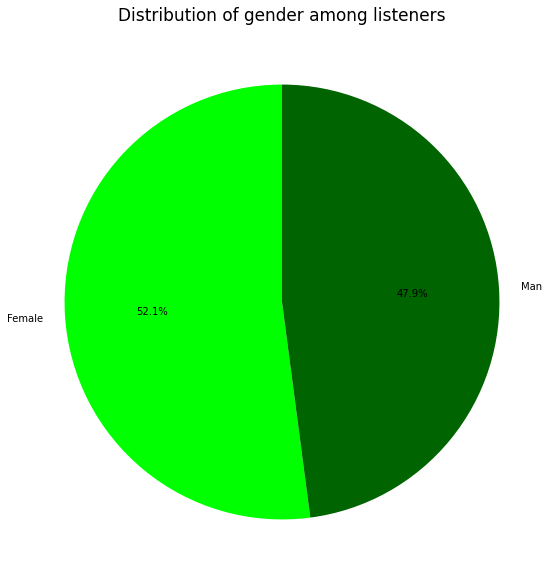

In [ ]:
# Pie Chart to show the distribution of gender
fig, ax = plt.subplots(figsize = (16,10))
gender = df["gender"].value_counts()
labels= ["Female", "Man"]
colors=["lime", "darkgreen"]
plt.pie(gender,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
ax.set_title("Distribution of gender among listeners", size = 17, pad = 10)
fig.savefig("Distribution of gender among listeners.png", dpi=fig.dpi)

In [ ]:
# Create an age column
df["age"] = 2022 - main_df["birth_year"]

# Drop NA values from the age column
df = df[df["age"].notna()]
df.age.unique()

array([ 54.,  27.,  30.,  43.,  29.,  57.,  48.,  34.,  32.,  44.,  51.,
        24.,  52.,  40.,  28.,  63.,  49.,  33.,  67.,  70.,  42.,  31.,
        50.,  64.,  41.,  22.,  37.,  58.,  60.,  38.,  47.,  36.,  45.,
        20.,  21.,  23.,  66.,  25.,  39.,  56.,  26.,  46.,  53.,  35.,
        81.,  61.,  55.,  74.,  62., 121.,  59.,  69.,  78.,  65.,  72.,
        75., 113.,  86.,  68.,  89.,  19.,  71., 117., 108., 120.,  79.,
        16., 115., 111.,  73.,  94., 109.,  77.,  76., 122.,  95., 105.,
        91.,  88.,  92.,  82.,  90.,  80., 116., 106.,  97., 100., 107.,
        87.,  85., 110., 102.,  98.,  84.,  93., 112., 114.,  99., 103.,
       119., 118.,  18.,  96.,  83., 104., 101.,   5.,  13.,  17., 130.,
         6.,  12.,   8., 155.])

In [ ]:
# Choose values to drop from age variable
values = [121., 113., 117., 108., 112., 120., 115., 111., 109., 122.,
          105., 116., 106., 100., 107., 110., 102., 114., 103., 119., 
          118., 104., 101., 130., 155.]

# Drop rows that contain any value in the list
df = df[df.age.isin(values) == False]

# Change the data type
df["age"] = df["age"].astype('int64')
df.age.unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


array([54, 27, 30, 43, 29, 57, 48, 34, 32, 44, 51, 24, 52, 40, 28, 63, 49,
       33, 67, 70, 42, 31, 50, 64, 41, 22, 37, 58, 60, 38, 47, 36, 45, 20,
       21, 23, 66, 25, 39, 56, 26, 46, 53, 35, 81, 61, 55, 74, 62, 59, 69,
       78, 65, 72, 75, 86, 68, 89, 19, 71, 79, 16, 73, 94, 77, 76, 95, 91,
       88, 92, 82, 90, 80, 97, 87, 85, 98, 84, 93, 99, 18, 96, 83,  5, 13,
       17,  6, 12,  8])

Text(0.5, 0, 'Age')

(0.0, 100.0)

(0.0, 0.1)

[]

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of listeners’ age')

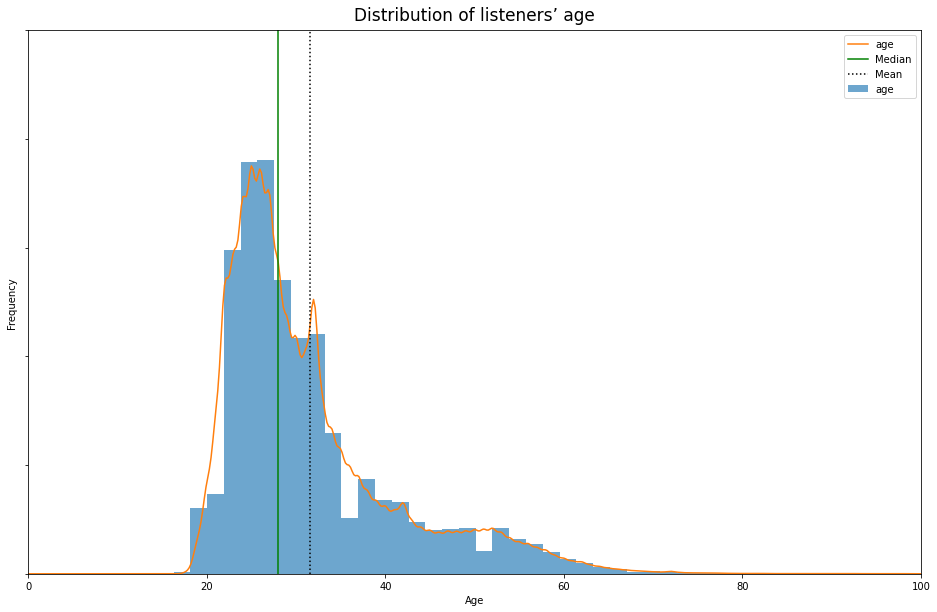

In [ ]:
# Histogram for age variable 
#The histogram is inspired by (Hilsdorf, 2020) https://medium.com/p/5f093ad7b9d3
age = df["age"]
fig, ax = plt.subplots(figsize = (16,10))
age.plot(kind = "hist", density = True, alpha = 0.65, bins = 50) 
age.plot(kind = "kde")

ax.set_xlabel("Age")
   
x_start, x_end = 0, 100
ax.set_xlim(x_start, x_end)

ax.set_ylim(0, 0.1)
ax.set_yticklabels([])
ax.set_ylabel("Frequency")

median=age.median()
ax.axvline(median, color='green', linestyle='-', label="Median")
mean=age.mean()
ax.axvline(mean, color='black', linestyle=':', label="Mean")

ax.legend()

ax.grid(False)
ax.set_title("Distribution of listeners’ age", size = 17, pad = 10)
fig.savefig("Distribution of listeners' age.png", dpi=fig.dpi)

([<matplotlib.patches.Wedge at 0x7ff4f39703d0>,
 [Text(-0.8860524068159782, -0.6518520786003621, 'Premium'),
  Text(0.8860524678467705, 0.6518519956421457, 'Free')],
 [Text(-0.4833013128087153, -0.3555556792365611, '70.2%'),
  Text(0.4833013460982384, 0.3555556339866249, '29.8%')])

Text(0.5, 1.0, 'Distribution of access types')

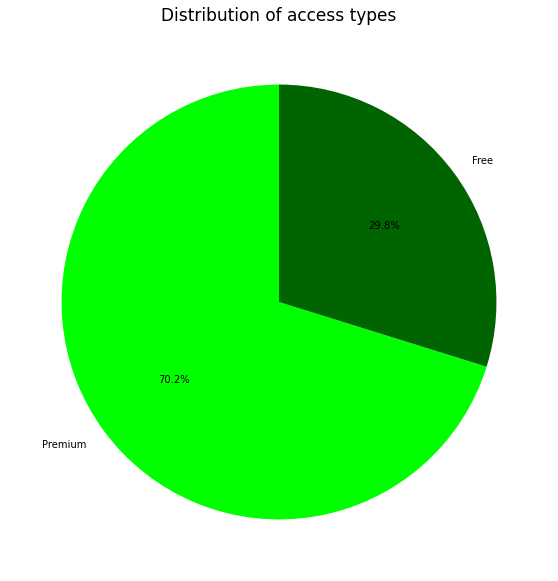

In [ ]:
# http://www.learningaboutelectronics.com/Articles/How-to-create-a-pie-chart-in-matplotlib-with-Python.php

# Only include the top two, other categories are too small
# Pie Chart to show the distribution of access variable
fig, ax = plt.subplots(figsize = (16,10))
access = df['access'].value_counts()
access = access.head(2)
labels= ['Premium','Free']
colors=['lime', 'darkgreen']
plt.pie(access,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
ax.set_title("Distribution of access types", size = 17, pad = 10)
fig.savefig("Distribution of access types.png", dpi=fig.dpi)

([<matplotlib.patches.Wedge at 0x7ff4f393c5d0>,
 [Text(-0.7080629088862506, -0.8418116874096851, 'True'),
  Text(0.7080629877023458, 0.8418116211160473, 'False')],
 [Text(-0.38621613211977296, -0.4591700113143737, '77.7%'),
  Text(0.3862161751103704, 0.4591699751542076, '22.3%')])

Text(0.5, 1.0, 'Distribution of mobile users')

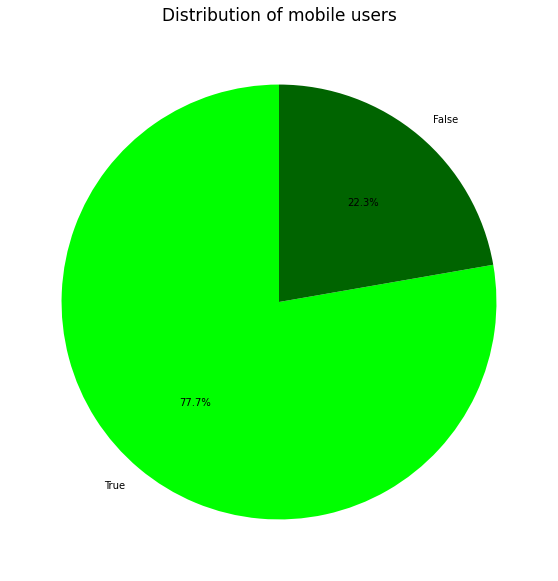

In [ ]:
# Pie Chart to show the distribution of mobile users
fig, ax = plt.subplots(figsize = (16,10))
mobile = df['mobile'].value_counts()
labels= ['True', 'False']
colors=['lime', 'darkgreen']
plt.pie(mobile,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
ax.set_title('Distribution of mobile users', size = 17, pad = 10)
fig.savefig('Distribution of mobile users.png', dpi=fig.dpi)

In [ ]:
stream_device = df['stream_device'].value_counts()
print(stream_device)

mobile     2338984
desktop     766889
tablet      339289
Name: stream_device, dtype: int64


([<matplotlib.patches.Wedge at 0x7ff4f39149d0>,
 [Text(-0.9307580952053283, -0.5862502607332037, 'Mobile'),
  Text(1.065066065647683, 0.27501686458427516, 'Desktop'),
  Text(0.33492830873535084, 1.047770503501448, 'Tablet')],
 [Text(-0.5076862337483607, -0.31977286949083833, '67.9%'),
  Text(0.5809451267169179, 0.15000919886415007, '22.3%'),
  Text(0.18268816840110044, 0.5715111837280624, '9.8%')])

Text(0.5, 1.0, 'Distribution of stream devices')

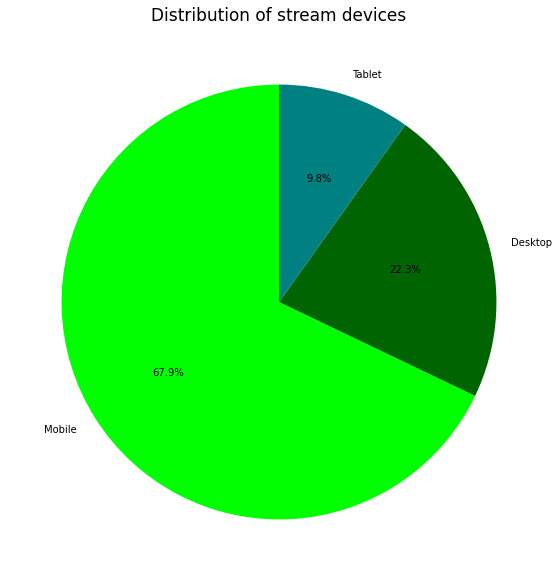

In [ ]:
# Pie Chart to show the distribution of stream device users
fig, ax = plt.subplots(figsize = (16,10))
stream_device = df['stream_device'].value_counts()
labels= ['Mobile', 'Desktop', 'Tablet']
colors=['lime', 'darkgreen', 'teal']
plt.pie(stream_device,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
ax.set_title('Distribution of stream devices', size = 17, pad = 10)
fig.savefig('Distribution of stream devices.png', dpi=fig.dpi)

In [ ]:
stream_os = df['stream_os'].value_counts()
print(stream_os)

iOS              2035401
Android           629838
Windows           315695
other             226114
Mac               182627
Browser            40876
Windows Phone      11313
Linux               3290
Blackberry             7
Wine                   1
Name: stream_os, dtype: int64


In [ ]:
# Distribution of stream operating systems
others = ["Browser", "Windows Phone", "Linux", "Blackberry", "Wine"]
df["stream_os1"] = df["stream_os"].apply(lambda x: "other" if x in others else x)
df["stream_os1"].describe()

count     3445162
unique          5
top           iOS
freq      2035401
Name: stream_os1, dtype: object

([<matplotlib.patches.Wedge at 0x7ff4f38c3050>,
 [Text(-1.055548605885348, -0.3095434389766614, 'iOS'),
  Text(1.0017138886963974, -0.454498938604637, 'Android'),
  Text(0.9969659425806731, 0.46482137357723813, 'Windows'),
  Text(0.6118668362246235, 0.9141219692844439, 'other'),
  Text(0.1823426653786922, 1.0847816150647993, 'Mac')],
 [Text(-0.5757537850283716, -0.16884187580545165, '59.1%'),
  Text(0.5463893938343986, -0.24790851196616562, '18.3%'),
  Text(0.5437996050440034, 0.2535389310421299, '9.2%'),
  Text(0.3337455470316128, 0.49861198324606026, '8.2%'),
  Text(0.09945963566110483, 0.5916990627626177, '5.3%')])

Text(0.5, 1.0, 'Distribution of stream operating systems')

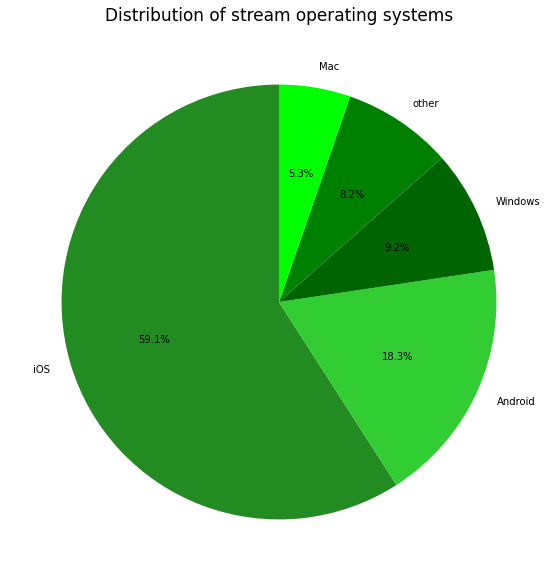

In [ ]:
fig, ax = plt.subplots(figsize = (16,10))
stream_os = df["stream_os1"].value_counts()
labels= ['iOS', 'Android', 'Windows', 'other', 'Mac']
colors=['forestgreen', 'limegreen', 'darkgreen', 'green', 'lime']
plt.pie(stream_os,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
ax.set_title('Distribution of stream operating systems', size = 17, pad = 10)
fig.savefig('Distribution of stream operating systems.png', dpi=fig.dpi)

### 3.2  <a class="anchor" id="3_2"></a> Creatives

Text(0.5, 0, 'Number of streams')

Text(0, 0.5, 'Artist name')

Text(0.5, 1.0, 'Top 10 artists')

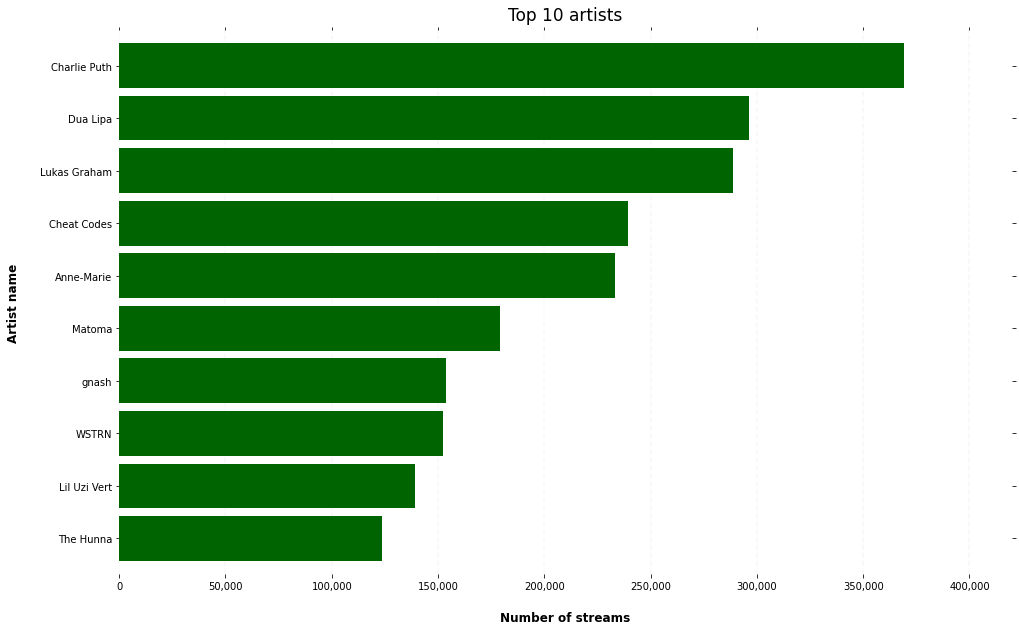

In [ ]:
# URL: https://mode.com/example-gallery/python_horizontal_bar/

# 1: Streams VS Artists
fig, ax = plt.subplots(figsize = (16,10))
x = df.value_counts('artist_name').sort_values().tail(10)
ax = x.plot(kind='barh', figsize=(16, 10), color='darkgreen', zorder=2, width=0.85)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
ax.set_xlabel("Number of streams", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Artist name", labelpad=20, weight='bold', size=12)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
ax.set_title('Top 10 artists', size = 17, pad = 10)
fig.savefig('Top 10 artists.png', dpi=fig.dpi)

Text(0.5, 0, 'Number of streams')

Text(0, 0.5, 'Song name')

Text(0.5, 1.0, 'Top 10 songs')

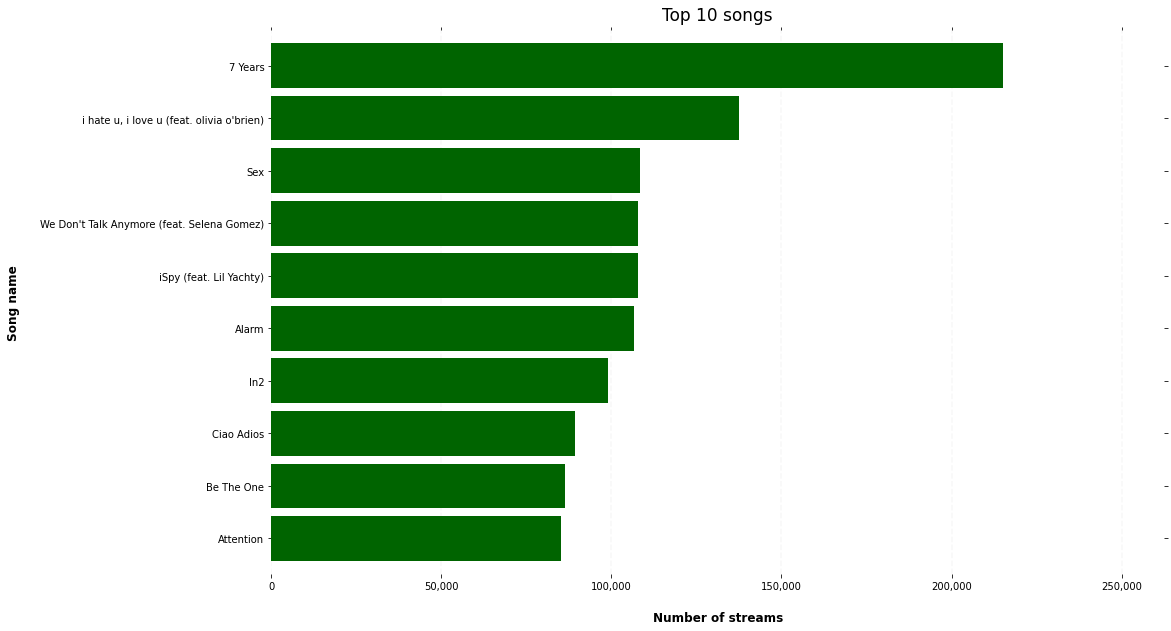

In [ ]:
# 2: Streams VS Tracks
fig, ax = plt.subplots(figsize = (16,10))
x = df.value_counts('track_name').sort_values().tail(10)
ax = x.plot(kind='barh', figsize=(16, 10), color='darkgreen', zorder=2, width=0.85)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
ax.set_xlabel("Number of streams", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Song name", labelpad=20, weight='bold', size=12)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
ax.set_title('Top 10 songs', size = 17, pad = 10)
fig.savefig('Top 10 songs.png', dpi=fig.dpi)

Text(0.5, 0, 'Number of streams')

Text(0, 0.5, 'Playlist name')

Text(0.5, 1.0, 'Top 10 playlists')

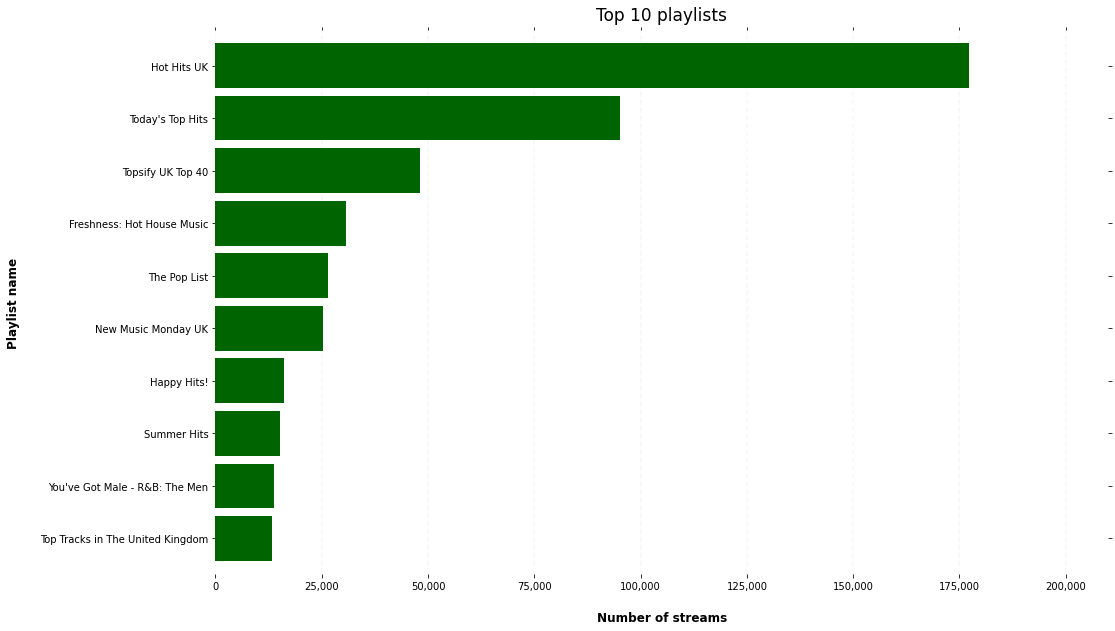

In [ ]:
# 3: Streams VS Playlists
fig, ax = plt.subplots(figsize = (16,10))
g = df.value_counts('playlist_name').sort_values().tail(10)
ax = g.plot(kind='barh', figsize=(16, 10), color='darkgreen', zorder=2, width=0.85)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
ax.set_xlabel("Number of streams", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Playlist name", labelpad=20, weight='bold', size=12)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
ax.set_title('Top 10 playlists', size = 17, pad = 10)
fig.savefig('Top 10 playlists', dpi=fig.dpi)

Text(0.5, 0, 'Number of streams')

Text(0, 0.5, 'Region')

Text(0.5, 1.0, 'Top 10 regions')

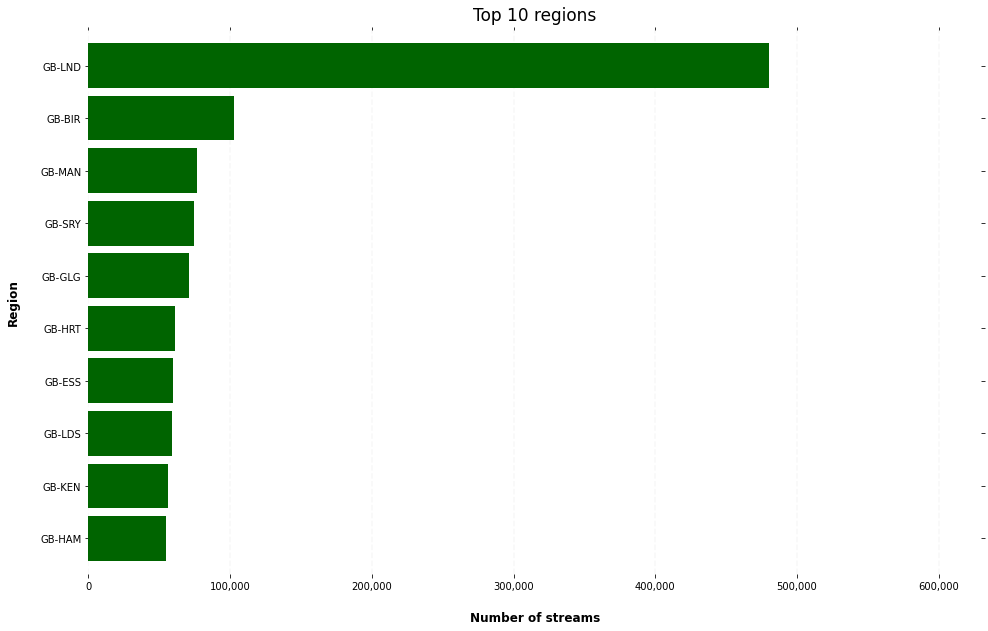

In [ ]:
# 4: Streams VS Regions
fig, ax = plt.subplots(figsize = (16,10))
x = df.value_counts('region_code').sort_values().tail(10)
ax = x.plot(kind='barh', figsize=(16, 10), color='darkgreen', zorder=2, width=0.85)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
ax.set_xlabel("Number of streams", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Region", labelpad=20, weight='bold', size=12)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
ax.set_title('Top 10 regions', size = 17, pad = 10)
fig.savefig('Top 10 regions.png', dpi=fig.dpi)

[(0.0, 1800000.0)]

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

Text(0, 0.5, 'Number of streams')

Text(0.5, 0, 'Year')

Text(0.5, 1.0, 'Number of streams per year')

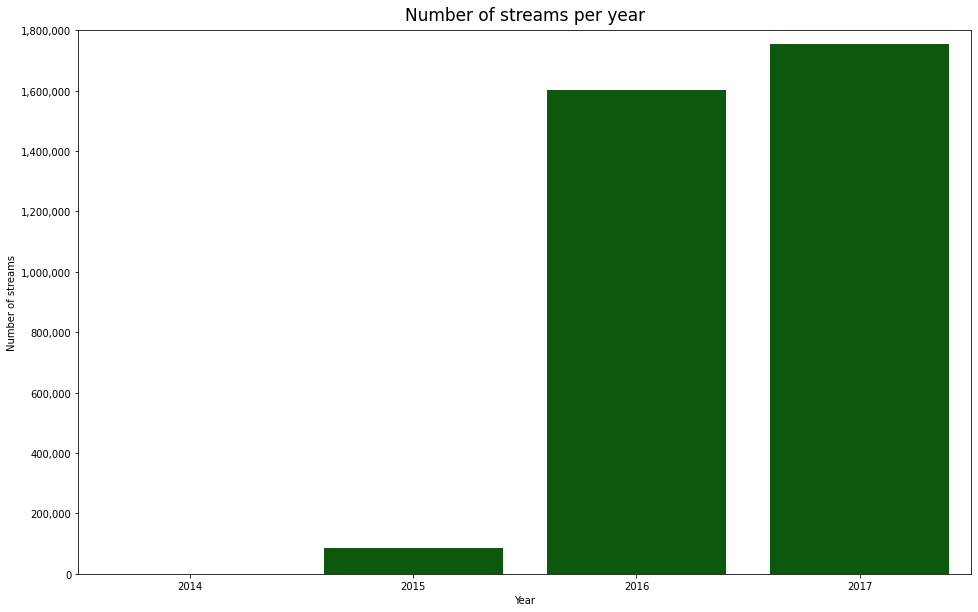

In [ ]:
# 5: Streams VS Years
fig, ax = plt.subplots(figsize = (16,10))
cp = sns.countplot(x = 'year', 
              color = 'darkgreen',
              data = df)
cp.set(ylim = (0,1800000))
cp.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation = 'horizontal')
plt.ylabel('Number of streams')
plt.xlabel('Year')
ax.set_title('Number of streams per year', size = 17, pad = 10)
fig.savefig('Number of streams per year.png', dpi=fig.dpi)

[(0.0, 500000.0)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

Text(0, 0.5, 'Number of streams')

Text(0.5, 0, 'Month')

Text(0.5, 1.0, 'Number of streams per month')

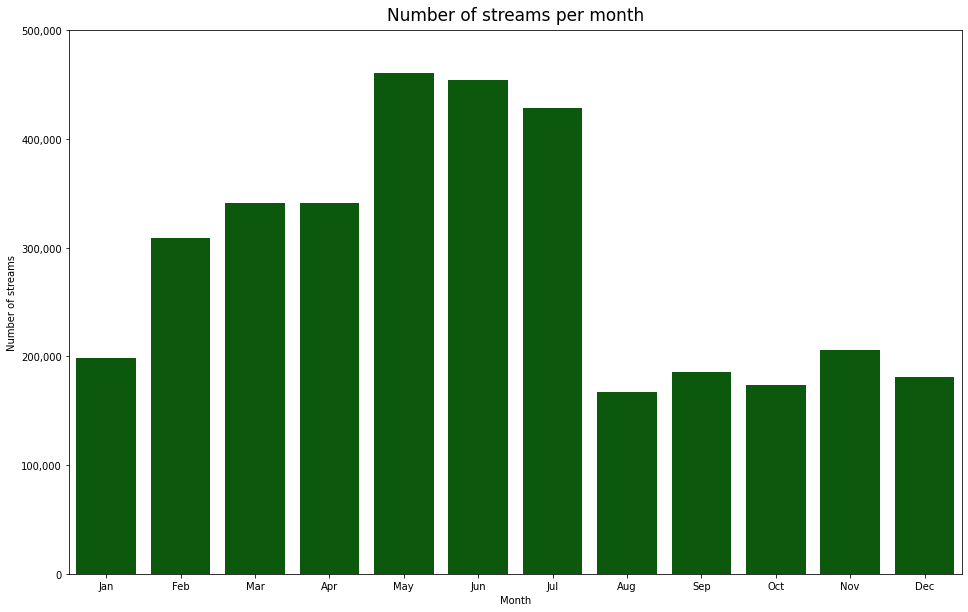

In [ ]:
# 6: Streams VS Months
fig, ax = plt.subplots(figsize = (16,10))
df['month_word'] = df['month']
df['month_word'].replace(1,'Jan',inplace=True)
df['month_word'].replace(2,'Feb',inplace=True)
df['month_word'].replace(3,'Mar',inplace=True)
df['month_word'].replace(4,'Apr',inplace=True)
df['month_word'].replace(5,'May',inplace=True)
df['month_word'].replace(6,'Jun',inplace=True)
df['month_word'].replace(7,'Jul',inplace=True)
df['month_word'].replace(8,'Aug',inplace=True)
df['month_word'].replace(9,'Sep',inplace=True)
df['month_word'].replace(10,'Oct',inplace=True)
df['month_word'].replace(11,'Nov',inplace=True)
df['month_word'].replace(12,'Dec',inplace=True)
order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

cp = sns.countplot(x = 'month_word',
              color = 'darkgreen',
              data = df, order = order)
cp.set(ylim = (0,500000))
cp.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation = 'horizontal')
plt.ylabel('Number of streams')
plt.xlabel('Month')
ax.set_title('Number of streams per month', size = 17, pad = 10)
df = df.drop(columns='month_word')
fig.savefig('Number of streams per month.png', dpi=fig.dpi)

## Chapter 4: <a class="anchor" id="chapter4"></a> Preprocessing

### 4.1  <a class="anchor" id="4_1"></a> Feature engineering


#### 4.1.1  <a class="anchor" id="4_1_1"></a> Creating dependent variable

In [ ]:
# Read the CSV and assign it to a variable
playlist_ids_and_titles = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/playlists_ids_and_titles.csv',encoding = 'latin-1',error_bad_lines=False,warn_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# Keep only those with 22 characters
playlist_mapper = playlist_ids_and_titles[playlist_ids_and_titles.id.str.len()==22].drop_duplicates(['id'])

In [ ]:
# 4 key Playlists
key_playlists = playlist_mapper[playlist_mapper.name.isin(['New Music Friday UK','Hot Hits UK','Massive Dance Hits','The Indie List'])]

# Select relevant playlists 
# Mapper function
def map_playlist_names(df,col_stream_source_uri,playlist_mapper):
    if col_stream_source_uri == 'index':
        df['playlist_id'] = df.index.astype(str).str[-22:]
        df['playlist_name'] = df.playlist_id.map(playlist_mapper.drop_duplicates(['id']).set_index('id')['name'])
        return df
    df['playlist_id'] = df[col_stream_source_uri].astype(str).str[-22:]
    df['playlist_name'] = df.playlist_id.map(playlist_mapper.drop_duplicates(['id']).set_index('id')['name'])
    # return df.drop('playlist_id',axis=1)
    return df

df = map_playlist_names(df, 'stream_source_uri', playlist_mapper)

# Define Dependent Variable
def get_successful_artists(data):
    data['successful_artists'] = np.where(
    (data['playlist_name'] == 'Hot Hits UK') 
        | (data['playlist_name'] == 'Massive Dance Hits') 
        | (data['playlist_name'] == 'The Indie List')
        | (data['playlist_name'] == 'New Music Friday UK'), 1, 0)
    
get_successful_artists(df)

In [ ]:
# Calculating the number of successful and unsuccessful artists
successful_total = df['successful_artists'].sum()
unsuccessful_total = len(df) - successful_total
successful_total, unsuccessful_total

(187094, 3258068)

In [ ]:
# Creating a dataframe
artist_classes = pd.DataFrame({'class': ['successful', 'unsuccessful'],
                              'artists_count': [187094, 3258068]})
artist_classes

,class,artists_count
0,successful,187094
1,unsuccessful,3258068


([<matplotlib.patches.Wedge at 0x7ff4e354e0d0>,
 [Text(1.084029843942949, 0.18675999957438935, 'successful'),
  Text(-1.0840298614286774, -0.18675989808018956, 'unsuccessful')])

Text(0.5, 1.0, 'Distribution of successful and unsuccessful arists')

Text(0.5, 1.0, 'Distribution of successful and unsuccessful arists')

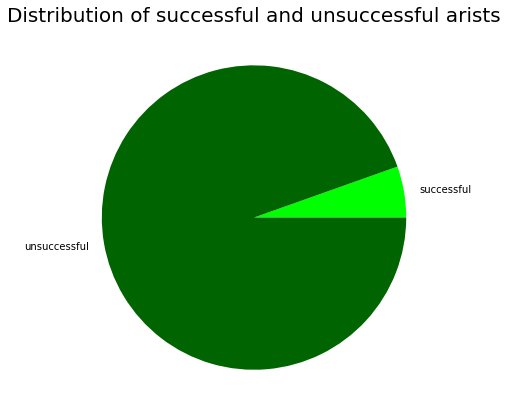

In [ ]:
# Same but in pie chart
fig = plt.figure(figsize =(10, 7))
plt.pie(artist_classes['artists_count'], labels = artist_classes['class'], colors=['lime','darkgreen'])
plt.title('Distribution of successful and unsuccessful arists', fontsize=20)
plt.title('Distribution of successful and unsuccessful arists', fontsize=20)
fig.savefig('Distribution of successful and unsuccessful arists.png', dpi=fig.dpi)

#### 4.1.2  <a class="anchor" id="4_1_2"></a> Artist features

##### Stream Count

In [ ]:
# Stream count per artist
df_artist_name = df['artist_name'].value_counts().rename_axis('artist_name').reset_index(name = 'stream_count')
df_artist_name.head(5)

,artist_name,stream_count
0,Charlie Puth,369309
1,Dua Lipa,296232
2,Lukas Graham,288840
3,Cheat Codes,239147
4,Anne-Marie,233135


##### Total Numbers of Users

In [ ]:
# Number of users per artist
df_nou_artist = df.groupby('artist_name')['customer_id'].nunique().rename_axis('artist_name').reset_index(name = 'total_user')

# Merging df_artist_name and df_nou_artist
df_artist_name = pd.merge(df_artist_name, df_nou_artist, on = ['artist_name', 'artist_name'], how = 'inner')
df_artist_name.head(5)

,artist_name,stream_count,total_user
0,Charlie Puth,369309,306519
1,Dua Lipa,296232,246271
2,Lukas Graham,288840,232535
3,Cheat Codes,239147,212436
4,Anne-Marie,233135,208584


##### Passion Score 

In [ ]:
# Passion Score
df_artist_name['artist_passion_score'] = df_artist_name['stream_count'] / df_artist_name['total_user']
df_artist_name.head(5)

,artist_name,stream_count,total_user,artist_passion_score
0,Charlie Puth,369309,306519,1.204849
1,Dua Lipa,296232,246271,1.202870
2,Lukas Graham,288840,232535,1.242136
3,Cheat Codes,239147,212436,1.125737
4,Anne-Marie,233135,208584,1.117703


In [ ]:
# Add a binary response variable to newly created dataframe
df_successful_artists = df.groupby('artist_name')['successful_artists'].sum().rename_axis('artist_name').reset_index(name='successful_artist')
df_successful_artists['successful_artist'] = np.where(df_successful_artists['successful_artist'] > 0, 1,0)

# Merging df_artist_name and df_successful_artists
df_artist_name = pd.merge(df_artist_name, df_successful_artists, on = ['artist_name','artist_name'], how = 'inner')
df_artist_name.head(5)

,artist_name,stream_count,total_user,artist_passion_score,successful_artist
0,Charlie Puth,369309,306519,1.204849,1
1,Dua Lipa,296232,246271,1.202870,1
2,Lukas Graham,288840,232535,1.242136,1
3,Cheat Codes,239147,212436,1.125737,1
4,Anne-Marie,233135,208584,1.117703,1


#### 4.1.3  <a class="anchor" id="4_1_3"></a> Playlist features

##### Stream Count

In [ ]:
# Stream count per playlist
df_playlist = df['playlist_name'].value_counts().rename_axis('playlist_name').reset_index(name='stream_count')
df_playlist.head(5)

,playlist_name,stream_count
0,Hot Hits UK,177202
1,Today's Top Hits,95251
2,Topsify UK Top 40,48014
3,Freshness: Hot House Music,30598
4,The Pop List,26359


##### Total Number of Users

In [ ]:
# Number of users per playlist
df_nou_playlist= df.groupby('playlist_name')['customer_id'].nunique().rename_axis('playlist_name').reset_index(name='total_user')

# Merge df_playlist and data_nou_playlist
df_playlist = pd.merge(df_playlist, df_nou_playlist, on=['playlist_name','playlist_name'], how = 'inner')
df_playlist.head(5)

,playlist_name,stream_count,total_user
0,Hot Hits UK,177202,139731
1,Today's Top Hits,95251,73940
2,Topsify UK Top 40,48014,27051
3,Freshness: Hot House Music,30598,25763
4,The Pop List,26359,22199


##### Passion Score

In [ ]:
# Passion score
df_playlist['passion_score'] = df_playlist['stream_count'] / df_playlist['total_user']
df_playlist.head(5)

,playlist_name,stream_count,total_user,passion_score
0,Hot Hits UK,177202,139731,1.268165
1,Today's Top Hits,95251,73940,1.288220
2,Topsify UK Top 40,48014,27051,1.774944
3,Freshness: Hot House Music,30598,25763,1.187672
4,The Pop List,26359,22199,1.187396


In [ ]:
# Use passion score to merge two dataframes
df_artist_playlist = df.groupby(['artist_name','playlist_name']).size().reset_index(name='count') 
df_artist_playlist = df_artist_playlist.merge(df_playlist, on = 'playlist_name')
df_artist_playlist = df_artist_playlist.groupby('artist_name')['passion_score'].unique().rename_axis('artist_name').reset_index(name='passion_score')

# Calculate average passion score for the top 20 playlists per artist
for index in range(len(df_artist_playlist)):
    df_artist_playlist.loc[index,'playlist_passion_score'] = sum(np.sort(df_artist_playlist.loc[index,'passion_score'])[::-1][:20])/20

# Merge df_artist and df_playlist
df_artist_name = pd.merge(df_artist_name, df_artist_playlist, on=['artist_name','artist_name'],how = 'left')

# set the Null value in influence score as 0
df_artist_name['playlist_passion_score']  = df_artist_name['playlist_passion_score'].fillna(0)

# Drop unnecessary column
df_artist_name = df_artist_name.drop(columns = ['passion_score'])

df_artist_name.head(5) 

,artist_name,stream_count,total_user,artist_passion_score,successful_artist,playlist_passion_score
0,Charlie Puth,369309,306519,1.204849,1,2.131632
1,Dua Lipa,296232,246271,1.202870,1,2.420629
2,Lukas Graham,288840,232535,1.242136,1,2.006121
3,Cheat Codes,239147,212436,1.125737,1,2.462039
4,Anne-Marie,233135,208584,1.117703,1,2.080842


##### Artist Frequency and Playlist Variation

In [ ]:
# Check the encoding for null values (where a track is not in any playlist)
df.playlist_name[:5]

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: playlist_name, dtype: object

In [ ]:
# New binary column for if a track appears in a playlist
df["in_playlist"] = [0 if n is np.nan else 1 for n in df["playlist_name"]]

In [ ]:
# Re-organize dataframe
df.insert(0, "playlist_name", df.pop("playlist_name"))
df.insert(0, "in_playlist", df.pop("in_playlist"))
df.head(3)

,in_playlist,playlist_name,log_time,mobile,track_id,artist_name,track_name,album_name,customer_id,access,gender,region_code,user_product_type,stream_length,stream_source,stream_source_uri,stream_device,stream_os,track_artists,month,year,age,stream_os1,playlist_id,successful_artists
0,0,NaN,20160510T12:15:00,True,8f1924eab3804f308427c31d925c1b3f,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,6c022a8376c10aae37abb839eb7625fe,free,male,GB-DUR,ad,277.0,album,NaN,mobile,Android,Sturgill Simpson,5,2016,54,Android,nan,0
1,0,NaN,20160510T12:15:00,True,8f1924eab3804f308427c31d925c1b3f,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,6c022a8376c10aae37abb839eb7625fe,free,male,GB-DUR,ad,53.0,album,NaN,mobile,Android,Sturgill Simpson,5,2016,54,Android,nan,0
2,0,NaN,20160510T14:00:00,True,8f1924eab3804f308427c31d925c1b3f,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,352292382ff3ee0cfd3b73b94ea0ff8f,premium,male,GB-ESS,paid,326.0,collection,NaN,mobile,Android,Sturgill Simpson,5,2016,27,Android,nan,0


In [ ]:
# Check how many total artists appear in playlists
np.count_nonzero(df.in_playlist)

881665

In [ ]:
# How many times a particular artist appears in a playlist
artist_freq = []
artists = df["artist_name"].unique()

for artist in artists:
    artist_freq.append(df.loc[df['artist_name'] == artist, 'in_playlist'].sum())

In [ ]:
# How many unique tracks are in a particular playlist
playlist_var = []
playlists = df["playlist_name"].unique()

for playlist in playlists:
    playlist_var.append(df.loc[df['playlist_name'] == playlist, 'track_name'].nunique())

In [ ]:
# Check if there is the same number of rows
len(df.artist_name.unique()) == len(artist_freq)

True

In [ ]:
# Check if there is the same number of rows
len(df.playlist_name.unique()) == len(playlist_var)

True

In [ ]:
# Create dictionaries with labels and new features
artist_freq_dict = dict(zip(artists, artist_freq))
playlist_var_dict = dict(zip(playlists, playlist_var))

In [ ]:
# Map new artist frequency feature to column, rename, and insert into dataframe
df_artist_name['artist_freq'] = df_artist_name['artist_name'].map(artist_freq_dict)
df_artist_name.head()

,artist_name,stream_count,total_user,artist_passion_score,successful_artist,playlist_passion_score,artist_freq
0,Charlie Puth,369309,306519,1.204849,1,2.131632,78397
1,Dua Lipa,296232,246271,1.202870,1,2.420629,83525
2,Lukas Graham,288840,232535,1.242136,1,2.006121,51308
3,Cheat Codes,239147,212436,1.125737,1,2.462039,64727
4,Anne-Marie,233135,208584,1.117703,1,2.080842,70735


In [ ]:
# Map playlist variation feature to column, rename, and insert into dataframe
df_playlist['playlist_var'] = df_playlist['playlist_name'].map(playlist_var_dict)
df_playlist.head(5)

,playlist_name,stream_count,total_user,passion_score,playlist_var
0,Hot Hits UK,177202,139731,1.268165,129
1,Today's Top Hits,95251,73940,1.288220,87
2,Topsify UK Top 40,48014,27051,1.774944,71
3,Freshness: Hot House Music,30598,25763,1.187672,51
4,The Pop List,26359,22199,1.187396,57


In [ ]:
# Once mapped to df_playlist, map to playlist_passion_score within df_artist_name
playlist_var_new_dict = dict(zip(df_playlist['passion_score'].values, df_playlist['playlist_var'].values))

keys = list(playlist_var_new_dict.keys())
keys = keys + [0 for number in range(len(keys),len(df_artist_name))]

df_artist_name['keys'] = keys

for index in range(len(df_artist_name)):
    df_artist_name['keys'][index] = df_artist_name['playlist_passion_score'][index]

values = list(playlist_var_new_dict.values()) 
values = values + [0 for number in range(len(values),len(df_artist_name))]
df_artist_name["playlist_var"] = values

df_artist_name.drop(columns = 'keys', inplace = True)
df_artist_name.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,artist_name,stream_count,total_user,artist_passion_score,successful_artist,playlist_passion_score,artist_freq,playlist_var
0,Charlie Puth,369309,306519,1.204849,1,2.131632,78397,129
1,Dua Lipa,296232,246271,1.202870,1,2.420629,83525,87
2,Lukas Graham,288840,232535,1.242136,1,2.006121,51308,71
3,Cheat Codes,239147,212436,1.125737,1,2.462039,64727,51
4,Anne-Marie,233135,208584,1.117703,1,2.080842,70735,57


#### 4.1.4  <a class="anchor" id="4_1_4"></a> User base features

##### Gender Percentage Breakdown

In [ ]:
# Drop duplicates 
df_unique = df.drop_duplicates(subset = ['customer_id'])

# Table for gender breakdown
df_gender = pd.crosstab(df_unique['artist_name'], df_unique['gender'])

# Estimate male percentage
df_gender['male_perc'] = df_gender['male'] / (df_gender['male'] + df_gender['female'])

# Estimate female percentage
df_gender['female_perc'] = df_gender['female'] / (df_gender['male'] + df_gender['female'])

# Drop columns from gender breakdown table because we have male-female ratio instead of gender
df_gender = df_gender.drop(columns = ['male', 'female'])

# Merge with df_artist_name
df_artist_name = pd.merge(df_artist_name, df_gender, on = ['artist_name', 'artist_name'], how = 'inner')
df_artist_name.head(5)

,artist_name,stream_count,total_user,artist_passion_score,successful_artist,playlist_passion_score,artist_freq,playlist_var,male_perc,female_perc
0,Charlie Puth,369309,306519,1.204849,1,2.131632,78397,129,0.411842,0.588158
1,Dua Lipa,296232,246271,1.202870,1,2.420629,83525,87,0.399674,0.600326
2,Lukas Graham,288840,232535,1.242136,1,2.006121,51308,71,0.517115,0.482885
3,Cheat Codes,239147,212436,1.125737,1,2.462039,64727,51,0.443307,0.556693
4,Anne-Marie,233135,208584,1.117703,1,2.080842,70735,57,0.387061,0.612939


##### Age Vector Quantization

In [ ]:
# Create age categories
df_unique['age_groups'] = np.where(df_unique['age'].between(0, 18), 'Dependent',
                                   np.where(df_unique['age'].between(19, 25), 'YoungAdult',
                                            np.where(df_unique['age'].between(26, 50), 'Adult',
                                                     np.where(df_unique['age'].between(51, 100), 'Senior', df_unique['age']))))

            
# Table for age groups
df_avq = pd.crosstab(df_unique['artist_name'], df_unique['age_groups'])

# Estimate ratios
df_avq['dependent_perc'] = df_avq['Dependent'] / (df_avq['Dependent'] + df_avq['YoungAdult'] + df_avq['Adult'] + df_avq['Senior'])
df_avq['youngadult_perc'] = df_avq['YoungAdult'] / (df_avq['Dependent'] + df_avq['YoungAdult'] + df_avq['Adult'] + df_avq['Senior'])
df_avq['adult_perc'] = df_avq['Adult'] / (df_avq['Dependent'] + df_avq['YoungAdult'] + df_avq['Adult'] + df_avq['Senior'])
df_avq['senior_perc'] = df_avq['Senior'] / (df_avq['Dependent'] + df_avq['YoungAdult'] + df_avq['Adult'] + df_avq['Senior'])

# Drop columns from age breakdown table
df_avq = df_avq.drop(columns = ['Dependent', 'YoungAdult', 'Adult', 'Senior'])

# Merge with df_artist_name
df_artist_name = pd.merge(df_artist_name, df_avq, on = ['artist_name', 'artist_name'], how = 'inner')
df_artist_name.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,artist_name,stream_count,total_user,artist_passion_score,successful_artist,playlist_passion_score,artist_freq,playlist_var,male_perc,female_perc,dependent_perc,youngadult_perc,adult_perc,senior_perc
0,Charlie Puth,369309,306519,1.204849,1,2.131632,78397,129,0.411842,0.588158,0.000950,0.298608,0.613525,0.086917
1,Dua Lipa,296232,246271,1.202870,1,2.420629,83525,87,0.399674,0.600326,0.000591,0.255832,0.665493,0.078085
2,Lukas Graham,288840,232535,1.242136,1,2.006121,51308,71,0.517115,0.482885,0.000280,0.268976,0.645871,0.084873
3,Cheat Codes,239147,212436,1.125737,1,2.462039,64727,51,0.443307,0.556693,0.000704,0.315804,0.624637,0.058855
4,Anne-Marie,233135,208584,1.117703,1,2.080842,70735,57,0.387061,0.612939,0.001219,0.295681,0.633725,0.069374


### 4.2  <a class="anchor" id="4_2"></a> Label encoding

In [ ]:
# Show the data type of each variable
df_artist_name.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 644 entries, 0 to 643
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   artist_name             644 non-null    object 
 1   stream_count            644 non-null    int64  
 2   total_user              644 non-null    int64  
 3   artist_passion_score    644 non-null    float64
 4   successful_artist       644 non-null    int64  
 5   playlist_passion_score  644 non-null    float64
 6   artist_freq             644 non-null    int64  
 7   playlist_var            644 non-null    int64  
 8   male_perc               644 non-null    float64
 9   female_perc             644 non-null    float64
 10  dependent_perc          644 non-null    float64
 11  youngadult_perc         644 non-null    float64
 12  adult_perc              644 non-null    float64
 13  senior_perc             644 non-null    float64
dtypes: float64(8), int64(5), object(1)
memory 

In [ ]:
catcols = ['artist_name']

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Label encoding
en = LabelEncoder()
for cols in catcols:
    df_artist_name[cols] = en.fit_transform(df_artist_name[cols])
print('Dataframe encoded by Label encoding dimension : ', df_artist_name.shape)

Dataframe encoded by Label encoding dimension :  (644, 14)


In [ ]:
df_artist_name.head()
len(df_artist_name)

,artist_name,stream_count,total_user,artist_passion_score,successful_artist,playlist_passion_score,artist_freq,playlist_var,male_perc,female_perc,dependent_perc,youngadult_perc,adult_perc,senior_perc
0,101,369309,306519,1.204849,1,2.131632,78397,129,0.411842,0.588158,0.000950,0.298608,0.613525,0.086917
1,155,296232,246271,1.202870,1,2.420629,83525,87,0.399674,0.600326,0.000591,0.255832,0.665493,0.078085
2,330,288840,232535,1.242136,1,2.006121,51308,71,0.517115,0.482885,0.000280,0.268976,0.645871,0.084873
3,104,239147,212436,1.125737,1,2.462039,64727,51,0.443307,0.556693,0.000704,0.315804,0.624637,0.058855
4,42,233135,208584,1.117703,1,2.080842,70735,57,0.387061,0.612939,0.001219,0.295681,0.633725,0.069374


644

In [ ]:
df_artist_name.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 644 entries, 0 to 643
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   artist_name             644 non-null    int64  
 1   stream_count            644 non-null    int64  
 2   total_user              644 non-null    int64  
 3   artist_passion_score    644 non-null    float64
 4   successful_artist       644 non-null    int64  
 5   playlist_passion_score  644 non-null    float64
 6   artist_freq             644 non-null    int64  
 7   playlist_var            644 non-null    int64  
 8   male_perc               644 non-null    float64
 9   female_perc             644 non-null    float64
 10  dependent_perc          644 non-null    float64
 11  youngadult_perc         644 non-null    float64
 12  adult_perc              644 non-null    float64
 13  senior_perc             644 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 75.5

### 4.3 <a class="anchor" id="4_3"></a> Data splitting and scaling

In [ ]:
# Choose a response variable
Y = df_artist_name['successful_artist']
Y

0      1
1      1
2      1
3      1
4      1
      ..
639    0
640    0
641    0
642    0
643    0
Name: successful_artist, Length: 644, dtype: int64

In [ ]:
# Drop a response variable from the feature data set
X = df_artist_name.drop(columns = 'successful_artist')

In [ ]:
# Scale the explanatory variables
df_artist_name = pd.DataFrame(RobustScaler().fit_transform(X), columns=X.columns)
df_artist_name

,artist_name,stream_count,total_user,artist_passion_score,playlist_passion_score,artist_freq,playlist_var,male_perc,female_perc,dependent_perc,youngadult_perc,adult_perc,senior_perc
0,-0.685848,771.319060,689.502812,1.346100,3.652451,689.160440,10.909091,-0.577974,0.577974,0.000950,0.481198,-0.533312,0.314593
1,-0.517885,618.677807,553.961755,1.330226,4.176710,734.241758,7.090909,-0.623961,0.623961,0.000591,0.331481,-0.288129,0.226267
2,0.026439,603.237598,523.059618,1.645242,3.424766,451.015385,5.636364,-0.180091,0.180091,0.000280,0.377487,-0.380706,0.294153
3,-0.676516,499.440209,477.842520,0.711408,4.251831,568.984615,3.818182,-0.459048,0.459048,0.000704,0.541385,-0.480885,0.033971
4,-0.869362,486.882507,469.176603,0.646958,3.560316,621.802198,4.363636,-0.671634,0.671634,0.001219,0.470956,-0.438007,0.139165
...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,0.816485,-0.081462,-0.076490,-0.297340,-0.214460,-0.043956,-0.818182,1.644987,-1.644987,0.000000,-0.563929,1.290070,-0.554579
640,-0.371695,-0.081462,-0.076490,-0.297340,-0.214460,-0.043956,-0.818182,1.644987,-1.644987,0.000000,-0.563929,1.290070,-0.554579
641,0.010886,-0.081462,-0.076490,-0.297340,-0.214460,-0.043956,-0.818182,-2.134541,2.134541,0.000000,-0.563929,1.290070,-0.554579
642,-0.293935,-0.081462,-0.076490,-0.297340,-0.214460,-0.043956,-0.818182,1.644987,-1.644987,0.000000,-0.563929,1.290070,-0.554579


In [ ]:
# Split data set into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1, stratify=Y)

<Figure size 1008x504 with 0 Axes>

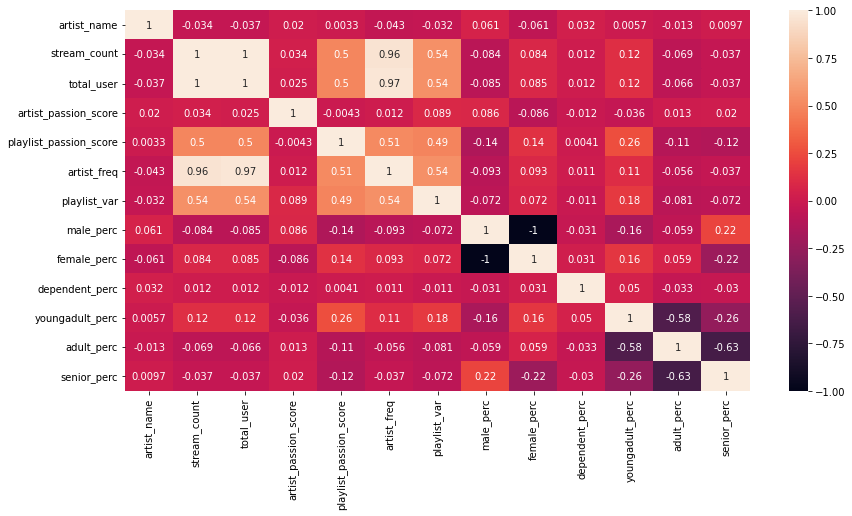

In [ ]:
# Plot a heatmap of the correlation matrix (of each numerical feature)
plt.figure(figsize = (14,7))
sns.heatmap(df_artist_name.corr(),annot = True)
plt.show()

In [ ]:
#songs by genre
# nat_cat_sz = df.groupby(['country', 'genre']).size().unstack()
# nat_cat_sz[:5] # take the first five countries by category
# COL_NUM = 2
# ROW_NUM = 3
# fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))
# # iteritems returns an iterator for the DataFrames columns in
# # the form of (column_label, column) tuples.
# for i, (label, col) in enumerate(nat_cat_sz.iteritems()):
#     ax = axes[int(i/COL_NUM), i%COL_NUM]
#     # sort by size and take the first ten
#     col = col.sort_values(ascending=False)[:10]
#     col.plot(kind='barh', ax=ax)
#     ax.set_title(label)
# plt.tight_layout()
# plt.savefig('dvpj_1110.png', dpi=300)

## Chapter 5: <a class="anchor" id="chapter5"></a> Model selection and training

### 5.1  <a class="anchor" id="5_1"></a> Logistic regression

In [ ]:
# Instantiate the model
log = LogisticRegression(random_state = 1)

# Train the model using the training sets
log.fit(X_train,Y_train)

# Predict the response for test dataset
log_y_pred=log.predict(X_test)

# Classification report and confusion matrix
print(classification_report(Y_test, log_y_pred))
print(confusion_matrix(Y_test, log_y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=1)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       115
           1       0.73      0.57      0.64        14

    accuracy                           0.93       129
   macro avg       0.84      0.77      0.80       129
weighted avg       0.93      0.93      0.93       129

[[112   3]
 [  6   8]]


### 5.2  <a class="anchor" id="5_2"></a> KNeighbors classifier

In [ ]:
# Create KNN Classifier
knn = KNeighborsClassifier()

# Train the model using the training sets
knn.fit(X_train, Y_train)

# Predict the response for test dataset
knn_y_pred = knn.predict(X_test)

# Classification report and confusion matrix
print(classification_report(Y_test, knn_y_pred))
print(confusion_matrix(Y_test, knn_y_pred))

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       115
           1       0.73      0.57      0.64        14

    accuracy                           0.93       129
   macro avg       0.84      0.77      0.80       129
weighted avg       0.93      0.93      0.93       129

[[112   3]
 [  6   8]]


### 5.3  <a class="anchor" id="5_3"></a> Decision tree classifier

In [ ]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier(random_state = 1)

# Train Decision Tree Classifer
dtc = dtc.fit(X_train,Y_train)

# Predict the response for test dataset
dtc_y_pred = dtc.predict(X_test)

# Classification report and confusion matrix
print(classification_report(Y_test, dtc_y_pred))
print(confusion_matrix(Y_test, dtc_y_pred))


              precision    recall  f1-score   support

           0       0.92      0.95      0.94       115
           1       0.45      0.36      0.40        14

    accuracy                           0.88       129
   macro avg       0.69      0.65      0.67       129
weighted avg       0.87      0.88      0.88       129

[[109   6]
 [  9   5]]


### 5.4  <a class="anchor" id="5_4"></a> Random forest classifier

In [ ]:
# Create a Gaussian Classifier
rfc = RandomForestClassifier(random_state = 1)

# Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train,Y_train)

# Prediction on test set
rfc_y_pred=rfc.predict(X_test)

# Classification report and confusion matrix
print(classification_report(Y_test, rfc_y_pred))
print(confusion_matrix(Y_test, rfc_y_pred))

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       115
           1       0.82      0.64      0.72        14

    accuracy                           0.95       129
   macro avg       0.89      0.81      0.84       129
weighted avg       0.94      0.95      0.94       129

[[113   2]
 [  5   9]]


### 5.5  <a class="anchor" id="5_5"></a> XGBoost

In [ ]:
# Create a Gaussian Classifier
xgb = XGBClassifier(random_state = 1)

# Train the model using the training sets y_pred=clf.predict(X_test)
xgb.fit(X_train,Y_train)

# Prediction on test set
xgb_y_pred=xgb.predict(X_test)

# Classification report and confusion matrix
print(classification_report(Y_test, xgb_y_pred))
print(confusion_matrix(Y_test, xgb_y_pred))


XGBClassifier(random_state=1)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       115
           1       0.67      0.71      0.69        14

    accuracy                           0.93       129
   macro avg       0.82      0.84      0.83       129
weighted avg       0.93      0.93      0.93       129

[[110   5]
 [  4  10]]


### 5.6  <a class="anchor" id="5_6"></a> SVM

In [ ]:
# Create a svm Classifier
svm = SVC(kernel='linear', random_state = 1, probability=True)

# Train the model using the training sets
svm.fit(X_train, Y_train)

# Predict the response for test dataset
svm_y_pred = svm.predict(X_test)

# Classification report and confusion matrix
print(classification_report(Y_test, svm_y_pred))
print(confusion_matrix(Y_test, svm_y_pred))


SVC(kernel='linear', probability=True, random_state=1)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       115
           1       0.58      0.79      0.67        14

    accuracy                           0.91       129
   macro avg       0.78      0.86      0.81       129
weighted avg       0.93      0.91      0.92       129

[[107   8]
 [  3  11]]


### 5.7  <a class="anchor" id="5_7"></a> Models comparison

The worst performing model was the decision tree with a harmonic mean equaling 0.88. The second worst was the SVC model with a 0.91 f1-score. Logistic regression, KNeighborsClassifier and XGBoost performed about the same with a 0.93 accuracy score. Random forest performed the best with 0.95 accuracies and 0.94 weighted average precision score.

<Figure size 1152x504 with 0 Axes>

Text(0.5, 1.0, 'Confusion matrix heatmaps of trained models')

Text(0.5, 1.0, 'Logistic Regression')

Text(0.5, 1.0, 'KNN')

Text(0.5, 1.0, 'Decision Tree')

Text(0.5, 1.0, 'Random Forest')

Text(0.5, 1.0, 'XGBoost')

Text(0.5, 1.0, 'SVM')

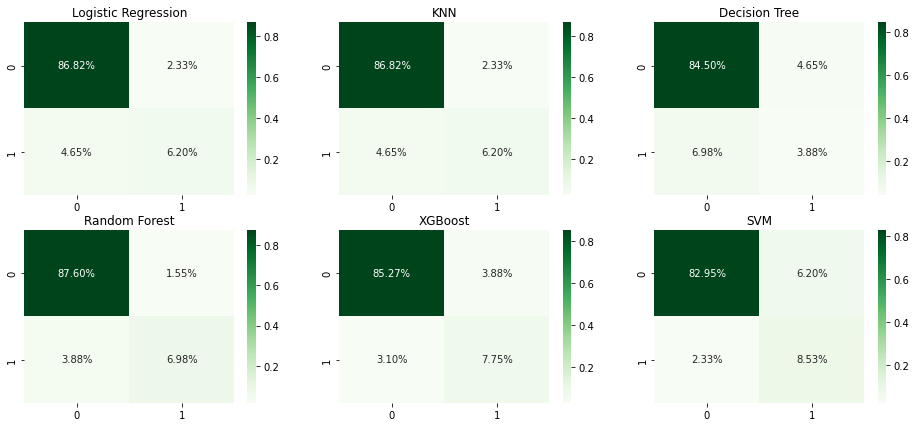

In [ ]:
# Setting figure to compare the confusion matrix of each model based on heatmaps
plt.figure(figsize=(16,7))
ax.set_title('Confusion matrix heatmaps of trained models', size = 17, pad = 10)

# Logistic model confusion matrix heatmap
plt.subplot(2,3,1)
sns.heatmap(confusion_matrix(Y_test,log_y_pred)/np.sum(confusion_matrix(Y_test,log_y_pred)), annot=True, fmt='.2%',cmap='Greens')
plt.title('Logistic Regression')

# KNN confusion matrix heatmap
plt.subplot(2,3,2)
sns.heatmap(confusion_matrix(Y_test,knn_y_pred)/np.sum(confusion_matrix(Y_test,knn_y_pred)), annot=True, fmt='.2%',cmap='Greens')
plt.title('KNN')

# Decision Tree confusion matrix heatmap
plt.subplot(2,3,3)
sns.heatmap(confusion_matrix(Y_test,dtc_y_pred)/np.sum(confusion_matrix(Y_test,dtc_y_pred)), annot=True, fmt='.2%',cmap='Greens')
plt.title('Decision Tree')

# Random Forest confusion matrix heatmap
plt.subplot(2,3,4)
sns.heatmap(confusion_matrix(Y_test,rfc_y_pred)/np.sum(confusion_matrix(Y_test,rfc_y_pred)), annot=True, fmt='.2%',cmap='Greens')
plt.title('Random Forest')

# XGBoost confusion matrix heatmap
plt.subplot(2,3,5)
sns.heatmap(confusion_matrix(Y_test,xgb_y_pred)/np.sum(confusion_matrix(Y_test,xgb_y_pred)), annot=True, fmt='.2%',cmap='Greens')
plt.title('XGBoost')

# SVM model confusion matrix heatmap
plt.subplot(2,3,6)
sns.heatmap(confusion_matrix(Y_test,svm_y_pred)/np.sum(confusion_matrix(Y_test,svm_y_pred)), annot=True, fmt='.2%',cmap='Greens')
plt.title('SVM')


plt.savefig('Confusion matrix heatmaps of trained models')

After training the models, they were compared by plotting confusion matrices alongside each other (fig. 5). Random forest is truly performing as the best model with 86.82% true values for unsuccessful artists and .75%  true values for successful values. These metrics are normal in this particular case, as the data is severely imbalanced, with much fewer instances in class 1 (successful artists). Therefore the models are better at identifying unsuccessful artists because most artists, in general, are considered unsuccessful.

## Chapter 6: <a class="anchor" id="chapter6"></a> Cross-validation

Cross-validation is used on the six machine learning models to shortlist the best-performing ones to be fine-tuned.

Text(0.5, 1.0, 'All models’ performance for comparison')

{'boxes': [<matplotlib.lines.Line2D at 0x7ff4d8177550>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff4d8185f90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff4d8126c90>,
 'means': [<matplotlib.lines.Line2D at 0x7ff4d8193b10>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff4d8193750>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff4d81779d0>,
  <matplotlib.lines.Line2D at 0x7ff4d80ff9d0>]}

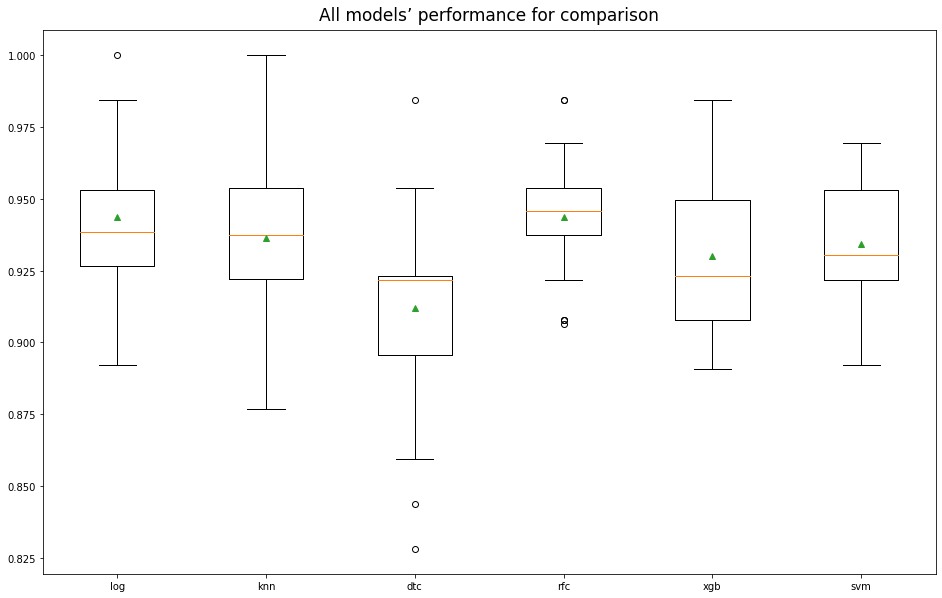

In [ ]:
#URL: https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/

fig, ax = plt.subplots(figsize = (16,10))

# get a list of models to evaluate
def get_models():
	models = dict()
	models['log'] = log
	models['knn'] = knn
	models['dtc'] = dtc
	models['rfc'] = rfc
	models['xgb'] = xgb
	models['svm'] = SVC() #without "probability" parameter as it takes ages
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, Y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X, Y)
  results.append(scores)
  names.append(name)
#  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
ax.set_title("All models’ performance for comparison", size = 17, pad = 10)
pyplot.boxplot(results, labels=names, showmeans=True)
fig.savefig("All models’ performance for comparison.png", dpi=fig.dpi)

Half of the models have outliers as indicated by values lying beyond the ‘whiskers’ in figure 6. The decision tree suffers from extreme values the most, which might explain its lowest scores in every metric as seen below.  Orange lines indicate accuracy mean, green triangles - mean accuracy per model.

In [ ]:
log_cv = cross_val_score(log, X_train, Y_train, cv=3, scoring="accuracy")
print('LOG accuracy score is ' + str(round(log_cv[1],3)*100) + '%')

knn_cv = cross_val_score(knn, X_train, Y_train, cv=3, scoring="accuracy")
print('KNN accuracy score is ' + str(round(knn_cv[1],3)*100) + '%')

dtc_cv = cross_val_score(dtc, X_train, Y_train, cv=3, scoring="accuracy")
print('DTC accuracy score is ' + str(round(dtc_cv[1],3)*100) + '%')

rfc_cv = cross_val_score(rfc, X_train, Y_train, cv=3, scoring="accuracy")
print('RFC accuracy score is ' + str(round(rfc_cv[1],3)*100) + '%')

xgb_cv = cross_val_score(xgb, X_train, Y_train, cv=3, scoring="accuracy")
print('XGB accuracy score is ' + str(round(xgb_cv[1],3)*100) + '%')

svm_cv = cross_val_score(svm, X_train, Y_train, cv=3, scoring="accuracy")
print('SVM accuracy score is ' + str(round(svm_cv[1],3)*100) + '%')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LOG accuracy score is 94.19999999999999%
KNN accuracy score is 94.19999999999999%
DTC accuracy score is 93.0%
RFC accuracy score is 94.8%
XGB accuracy score is 95.3%
SVM accuracy score is 95.3%


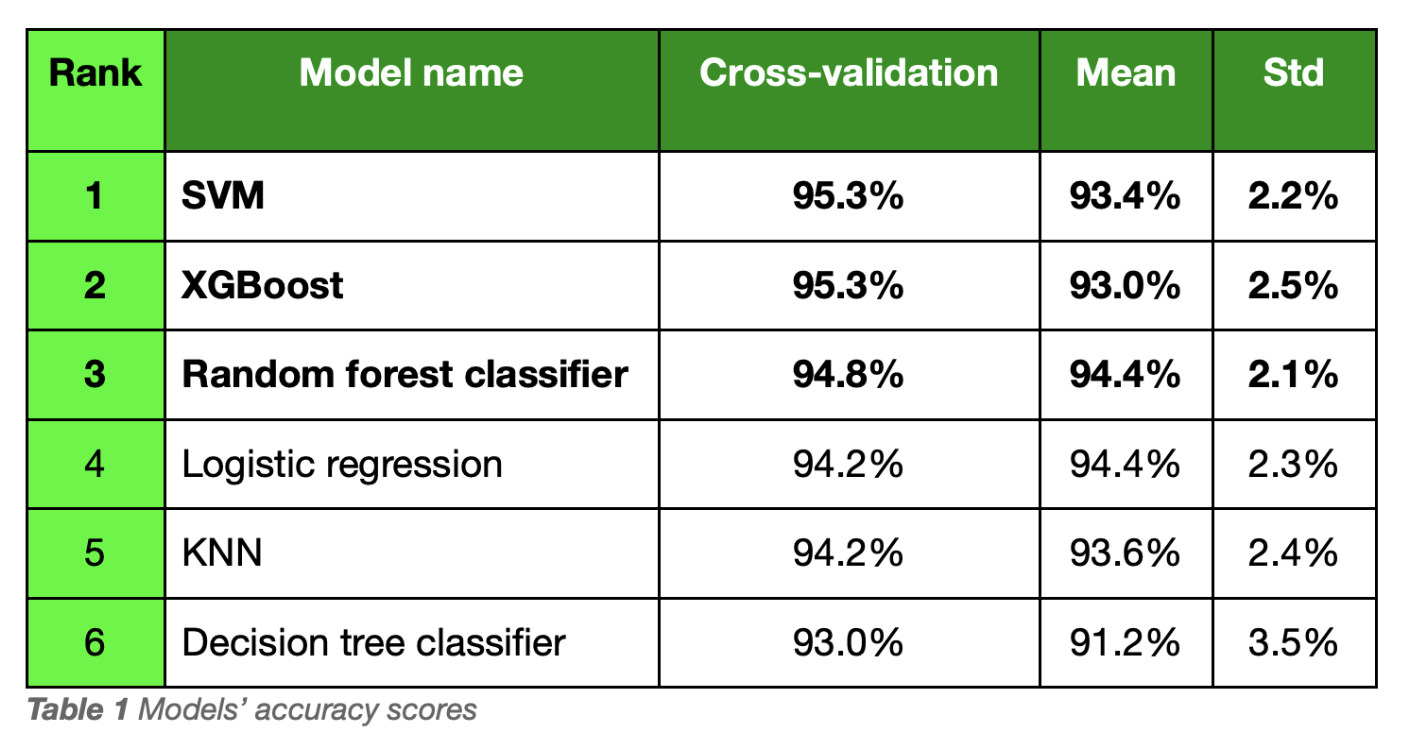

In [ ]:
display(image(filename='/content/drive/MyDrive/Colab Notebooks/table.png'))

Table 1 ranks the final accuracy scores of the models in descending order by cross-validation score and mean accuracy. Top three models were selected for the next stage.

## Chapter 7: <a class="anchor" id="chapter7"></a> Fine-tuning

### 7.1  <a class="anchor" id="7_1"></a> Grid search

As the first step in fine-tuning, grid searches were performed on SVM, XGBoost, and random forest classifier, none of which led to improvement in the accuracy score.

#### 7.1.1 <a class="anchor" id="7_1_1"></a> XGBoost

In [ ]:
# Look at parameters used by our current XGBoost model
print('Parameters currently in use:\n')
pprint(xgb.get_params())

Parameters currently in use:

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 1,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}


In [ ]:
#URL: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

# Defining parameter range
xgb_grid = {'learning_rate':[0.1],
    'n_estimators':[1000],
    'max_depth':[4,5,6],
    'min_child_weight':[6,8,10,12],
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)],
    'objective':['binary:logistic'],
    'nthread':[4],
    'scale_pos_weight':[1],
    'seed':[1]}

pprint(xgb_grid)

{'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
 'learning_rate': [0.1],
 'max_depth': [4, 5, 6],
 'min_child_weight': [6, 8, 10, 12],
 'n_estimators': [1000],
 'nthread': [4],
 'objective': ['binary:logistic'],
 'scale_pos_weight': [1],
 'seed': [1],
 'subsample': [0.6, 0.7, 0.8, 0.9]}


In [ ]:
# Fitting the model for grid search
xgb_tuned = GridSearchCV(XGBClassifier(), xgb_grid, refit = True)
xgb_tuned.fit(X_train, Y_train)

GridSearchCV(estimator=XGBClassifier(),
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.1], 'max_depth': [4, 5, 6],
                         'min_child_weight': [6, 8, 10, 12],
                         'n_estimators': [1000], 'nthread': [4],
                         'objective': ['binary:logistic'],
                         'scale_pos_weight': [1], 'seed': [1],
                         'subsample': [0.6, 0.7, 0.8, 0.9]})

In [ ]:
# print best parameter after tuning
print(xgb_tuned.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(xgb_tuned.best_estimator_)

{'colsample_bytree': 0.6, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 6, 'n_estimators': 1000, 'nthread': 4, 'objective': 'binary:logistic', 'scale_pos_weight': 1, 'seed': 1, 'subsample': 0.6}
XGBClassifier(colsample_bytree=0.6, gamma=0.2, max_depth=4, min_child_weight=6,
              n_estimators=1000, nthread=4, seed=1, subsample=0.6)


In [ ]:
# Base model results
xgb_base_y_pred = xgb.predict(X_test)
xgb_base_accuracy = round(metrics.accuracy_score(Y_test, xgb_base_y_pred), 3)*100
print('Accuracy of base XGB is ' + str(xgb_base_accuracy)+'%')

Accuracy of base XGB is 93.0%


In [ ]:
# Tuned model results
xgb_tuned = xgb_tuned.best_estimator_
xgb_tuned.fit(X_train, Y_train)
xgb_tuned_y_pred = xgb_tuned.predict(X_test)
xgb_tuned_accuracy = round(metrics.accuracy_score(Y_test, xgb_tuned_y_pred), 3)*100
print('Accuracy of tuned XGB is ' + str(xgb_tuned_accuracy)+'%')

XGBClassifier(colsample_bytree=0.6, gamma=0.2, max_depth=4, min_child_weight=6,
              n_estimators=1000, nthread=4, seed=1, subsample=0.6)

Accuracy of tuned XGB is 93.0%


In [ ]:
print('Improvement of {:0.2f}%'.format(100 * (xgb_tuned_accuracy - xgb_base_accuracy) / xgb_base_accuracy))

Improvement of 0.00%


#### 7.1.2  <a class="anchor" id="7_1_2"></a> SVM

In [ ]:
# Look at parameters used by our current SVM model
print('Parameters currently in use:\n')
pprint(svm.get_params())

Parameters currently in use:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': True,
 'random_state': 1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [ ]:
#URL: https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/

# Defining parameter range
svm_grid = {'C': [0.1, 1, 10],
            'gamma': [1, 0.1, 0.01],
            'kernel': ['linear']}
 
# Fitting the model for grid search
svm_tuned = GridSearchCV(SVC(), svm_grid, refit = True) 
svm_tuned.fit(X_train, Y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear']})

In [ ]:
# Base model results
svm_base_y_pred = svm.predict(X_test)
svm_base_accuracy = round(metrics.accuracy_score(Y_test, svm_base_y_pred), 3)*100
print('Accuracy of base SVM is ' + str(svm_base_accuracy)+'%')

Accuracy of base SVM is 91.5%


In [ ]:
# Tuned model results
svm_tuned = svm_tuned.best_estimator_
svm_tuned.fit(X_train, Y_train)
svm_tuned_y_pred = svm_tuned.predict(X_test)
svm_tuned_accuracy = round(metrics.accuracy_score(Y_test, svm_tuned_y_pred), 3)*100
print('Accuracy of tuned SVM is ' + str(svm_tuned_accuracy)+'%')

SVC(C=0.1, gamma=1, kernel='linear')

Accuracy of tuned SVM is 94.6%


In [ ]:
print('Improvement of {:0.2f}%'.format(100 * (svm_tuned_accuracy - svm_base_accuracy) / svm_base_accuracy))

Improvement of 3.39%


#### 7.1.3  <a class="anchor" id="7_1_3"></a> Random forest classifier

In [ ]:
from pprint import pprint
# Look at parameters used by our current random forest
print('Parameters currently in use:\n')
pprint(rfc.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [ ]:
# URL: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto','sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
                     'max_features': max_features,
                     'max_depth': max_depth,
                     'min_samples_split': min_samples_split,
                      'min_samples_leaf': min_samples_leaf,
                      'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000]}


In [ ]:
rfc_tuned = RandomizedSearchCV(estimator = rfc,
                               param_distributions = random_grid,
                               n_iter = 100,
                               cv = 6,
                               verbose = 2,
                               random_state = 1,
                               n_jobs = -1)
# Fit the random search model
rfc_tuned.fit(X_train, Y_train)

Fitting 6 folds for each of 100 candidates, totalling 600 fits


RandomizedSearchCV(cv=6, estimator=RandomForestClassifier(random_state=1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=1, verbose=2)

In [ ]:
# Base model results
random.seed(1)
rfc = RandomForestClassifier(random_state = 1)
rfc.fit(X_train, Y_train)
rfc_base_y_pred = rfc.predict(X_test)
rfc_base_accuracy = round(metrics.accuracy_score(Y_test, rfc_base_y_pred), 3)*100
print('Accuracy of base RFC is ' + str(rfc_base_accuracy)+'%')

RandomForestClassifier(random_state=1)

Accuracy of base RFC is 94.6%


In [ ]:
# Tuned model results
rfc_tuned = rfc_tuned.best_estimator_
rfc_tuned.fit(X_train, Y_train)
rfc_tuned_y_pred = rfc_tuned.predict(X_test)
rfc_tuned_accuracy = round(metrics.accuracy_score(Y_test, rfc_tuned_y_pred), 3)*100
print('Accuracy of tuned RFC is ' + str(rfc_tuned_accuracy)+'%')

RandomForestClassifier(bootstrap=False, max_depth=60, min_samples_split=5,
                       random_state=1)

Accuracy of tuned RFC is 94.6%


In [ ]:
print('Improvement of {:0.2f}%'.format(100 * (rfc_tuned_accuracy - rfc_base_accuracy) / rfc_base_accuracy))

Improvement of 0.00%


### 7.2  <a class="anchor" id="7_2"></a> Voting classifier

A voting classifier was then run in an attempt to collectively boost the model’s accuracy via ensemble learning techniques. However, this also did not have an impact on accuracy.

In [ ]:
voting_clf = VotingClassifier(
    estimators=[('xgb', xgb_tuned), ('svm', svm), ('rfc', rfc_tuned)],
    voting='soft')

voting_clf.fit(X_train, Y_train)
voting_y_pred = voting_clf.predict(X_test)
print(classification_report(Y_test, voting_y_pred))

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(colsample_bytree=0.6, gamma=0.2,
                                            max_depth=4, min_child_weight=6,
                                            n_estimators=1000, nthread=4,
                                            seed=1, subsample=0.6)),
                             ('svm',
                              SVC(kernel='linear', probability=True,
                                  random_state=1)),
                             ('rfc',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=60,
                                                     min_samples_split=5,
                                                     random_state=1))],
                 voting='soft')

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       115
           1       0.82      0.64      0.72        14

    accuracy                           0.95       129
   macro avg       0.89      0.81      0.84       129
weighted avg       0.94      0.95      0.94       129



In [ ]:
final_accuracy = round(metrics.accuracy_score(Y_test, voting_y_pred), 3)*100
print('Ultimate weighted average acccuracy of the model is ' + str(final_accuracy)+'%')

Ultimate weighted average acccuracy of the model is 94.6%


In [ ]:
print('Improvement of {:0.2f}%'.format(100 * (final_accuracy - rfc_tuned_accuracy) / rfc_tuned_accuracy))

Improvement of 0.00%


For a shorter runtime and ease of further evaluation, the fine-tuned random forest model was used as a final model to evaluate feature importance and tweak the number of independent variables if needed.

### 7.3  <a class="anchor" id="7_3"></a>  Feature importance

Reporting feature importance was done in two ways: by listing the values numerically, and visually.

In [ ]:
feature_imp = pd.Series(rfc_tuned.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_imp

artist_freq               0.225921
total_user                0.189881
stream_count              0.167078
playlist_passion_score    0.137240
dependent_perc            0.039149
youngadult_perc           0.035400
artist_passion_score      0.034679
female_perc               0.033392
senior_perc               0.028622
artist_name               0.027653
playlist_var              0.027257
adult_perc                0.027026
male_perc                 0.026701
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Importance Score')

Text(0, 0.5, 'Features')

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25]),
 <a list of 6 Text major ticklabel objects>)

Text(0.5, 1.0, 'Feature Importance')

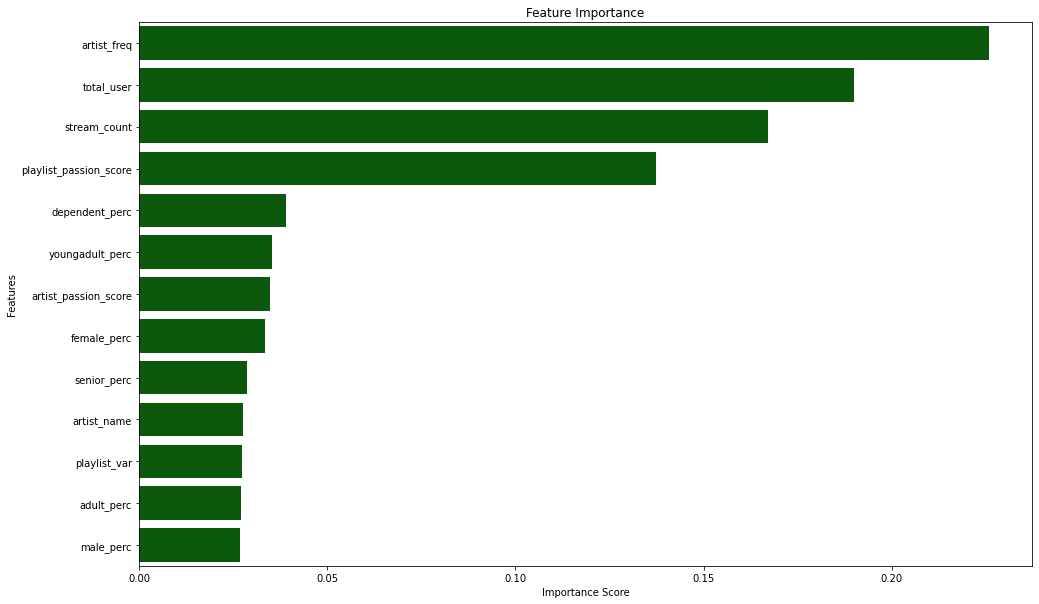

In [ ]:
# Create a new DataFrame for feature importance
rfc_tuned.feature_names = X.columns
rfc_tuned_feature_importance = pd.DataFrame({'Feature': rfc_tuned.feature_names,'Importance':rfc_tuned.feature_importances_})
rfc_tuned_feature_importance = rfc_tuned_feature_importance.sort_values(by = ['Importance'], ascending = False)

# Plotting the feature importance graph
fig, ax = plt.subplots(figsize = (16,10))
sns.barplot(rfc_tuned_feature_importance['Importance'], rfc_tuned_feature_importance['Feature'], color = 'darkgreen')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.xticks(rotation = 'horizontal')
plt.title('Feature Importance')
plt.savefig('Feature Importance.png')

In [ ]:
# Generating the model on all features

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1, stratify=Y)

random.seed(1)
rfc_tuned.fit(X_train,Y_train)
y_pred=rfc_tuned.predict(X_test)
print('Accuracy of RFC with all features is ' + str(round(metrics.accuracy_score(Y_test, y_pred), 3)*100)+'%')

RandomForestClassifier(bootstrap=False, max_depth=60, min_samples_split=5,
                       random_state=1)

Accuracy of RFC with all features is 94.6%


In [ ]:
# 1 feature dropped

X = X[['artist_name', 'stream_count', 'total_user',	'artist_passion_score',
      'playlist_passion_score',	'artist_freq',	'playlist_var',
      'female_perc',	'dependent_perc',	'youngadult_perc',	'adult_perc',	'senior_perc']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1, stratify=Y)

random.seed(1)
rfc_tuned.fit(X_train,Y_train)
y_pred=rfc_tuned.predict(X_test)
print('Accuracy of RFC with 1 feature dropped is ' + str(round(metrics.accuracy_score(Y_test, y_pred), 3)*100)+'%')

RandomForestClassifier(bootstrap=False, max_depth=60, min_samples_split=5,
                       random_state=1)

Accuracy of RFC with 1 feature dropped is 93.0%


Diminishing returns in performance occur after dropping just 1 feature, therefore all of the original features were kept to maintain maximum accuracy.

## Chapter 8: <a class="anchor" id="chapter8"></a> Performance evaluation

### 8.1  <a class="anchor" id="8_1"></a> Confusion matrix

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff4d7d87850>)

Text(0.5, 51.0, 'Predicted Values')

Text(51.0, 0.5, 'Actual Values')

Text(0.5, 1.0, 'Confusion Matrix of the Final Model')

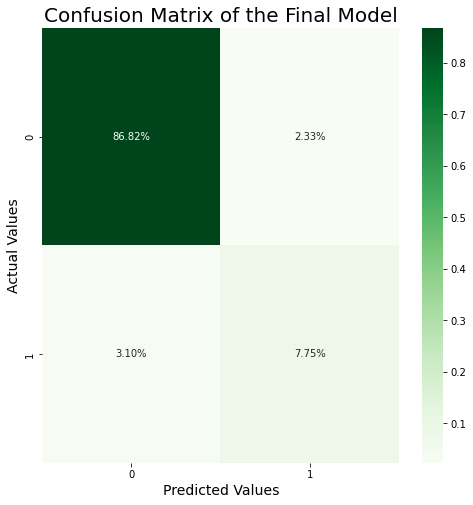

In [ ]:
# Logistic model confusion matrix heatmap
plt.subplots(figsize = (8,8))
sns.heatmap(confusion_matrix(Y_test, rfc_tuned_y_pred)/np.sum(confusion_matrix(Y_test, rfc_tuned_y_pred)), annot=True, fmt='.2%',cmap='Greens')
plt.xlabel('Predicted Values', fontsize = 14) 
plt.ylabel('Actual Values', fontsize = 14)
plt.title('Confusion Matrix of the Final Model', fontsize = 20)
plt.savefig('Confusion Matrix of the Final Model.png')

The rate of correctly classified unsuccessful artists and successful artists is 86.82% and 7.75% respectively. 3.10% of observations were classified as successful artists whilst actually being unsuccessful (this is the false positive rate). 2.33% of observations were false negatives, meaning they were predicted to be unsuccessful but were in fact, successful artists. Overall 94.57% of the predictions are accurately classified – this is a good score considering the data at hand, thus, the model performed well on the test set.

### 8.2  <a class="anchor" id="8_2"></a> ROC curve

No Skill: ROC AUC=0.500
Final model: ROC AUC=0.905


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC curve')

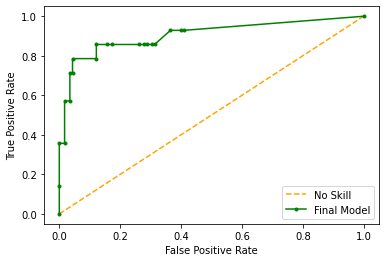

In [ ]:
# Generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]

# Fit a model
final_model = rfc_tuned.fit(X_train, Y_train)

# Predict probabilities
final_probs = rfc_tuned.predict_proba(X_test)

# Keep probabilities for the positive outcome only
final_probs = final_probs[:, 1]

# Calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
final_auc = roc_auc_score(Y_test, final_probs)

# Summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Final model: ROC AUC=%.3f' % (final_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, final_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color='orange')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Final Model', color='green')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend(loc='lower right')

ax.set_title("ROC curve", size = 17, pad = 10)
fig.savefig("ROC curve.png", dpi=fig.dpi)

An ROC curve is used to deepen the analysis of predictive power and goodness of fit of the fine-tuned random forest. For an ROC curve, it is desirable to be as close as possible to the top-left corner of the graph. The area under the curve is 0.876, the maximum possible score is 1. Hence, the classification accuracy of the fine-tuned random forest is adequate. The dotted yellow line represents an untrained "no skill" classifier which gives a recall equal to 0.5, akin to a coin toss. The green line shows the final model’s predictions; the bigger the area under the curve, the better the predictive power is.

### 8.3  <a class="anchor" id="8_3"></a> Precision-Recall curve

Final model scores: f1=0.640 auc=0.729


Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

Text(0.5, 1.0, 'Precision-recall curve')

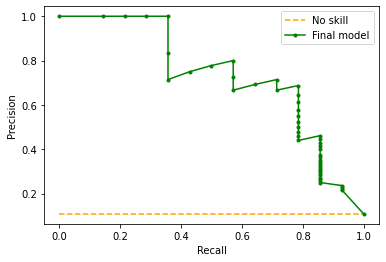

In [ ]:
# Predict class values
yhat = final_model.predict(X_test)
final_precision, final_recall, _ = precision_recall_curve(Y_test, final_probs)
final_f1, final_auc = f1_score(Y_test, yhat), auc(final_recall, final_precision)

# Summarize scores
print('Final model scores: f1=%.3f auc=%.3f' % (final_f1, final_auc))

# Plot the precision-recall curves
no_skill = len(Y_test[Y_test==1]) / len(Y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No skill', color='orange')
pyplot.plot(final_recall, final_precision, marker='.', label='Final model', color='green')

pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
ax.set_title("Precision-recall curve", size = 17, pad = 10)
fig.savefig("Precision-recall curve.png", dpi=fig.dpi)

Given the imbalance between successful and unsuccessful artists, the precision-recall relationship is analysed to further evaluate the success of the model’s classifications. Precision quantifies the number of predicted successful artists by the model which actually belongs to that class. Recall quantifies the number of ‘successful’ predictions out of all true successful instances in the data. AUC score is desired to be as high as possible, with the maximum being 1. The higher the score the higher both precision and recall will be. Thus, the model will return more accurate results (precision) whilst the majority of results returned is positive (recall). The models’ AUC is 0.688 which is satisfactory for the analysis. 

## Chapter 9: <a class="anchor" id="chapter9"></a> Conclusion

This project used a secondary dataset to investigate features that impact artists’ success in terms of being added to the most popular playlists. Initial data analysis and exploration revealed interesting trends, but very little in terms of useful inputs for machine learning models. Considerable feature engineering and data pre-processing and transformation had to be undertaken before any classification models could be trained on data that served as functional representations of artist success and what factors may affect it. 


Six machine learning models were tested and evaluated, with a final random forest classifier being chosen as the best possible predictor of artist success within this project scope. The final model can be applied in a practical setting both by an artists’ marketing team and the artists themselves to give insight into what may predict or impact their success. It is suggested that artists’ release frequency, song’s total listeners, and the number of streams (not length) are the most influential features that add tracks to top playlists and thus have a higher chance of success overall. For example, it is better to create short catchy songs that would be on repeat, rather than ones with long duration.


Since there were not many explanatory variables, the model has suffered from the reduced precision of class predictions. More quantitative data would give more informative insights which could have been improved by merging additional datasets with the same tracks. A transformation pipeline would also aid in pre-processing and data splitting steps by increasing speed and efficiency. While other fine-tuning techniques would be worth applying, including more iterations within a grid search likely have led nowhere as it seems that the model has reached its maximum potential accuracy score under its current state. 

## Chapter 10: <a class="anchor" id="chapter10"></a> References

GeeksforGeeks. (2019). SVM Hyperparameter Tuning using GridSearchCV | ML. [online] Available at: https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/ [Accessed 19 Mar. 2022].

Kästle, K. (n.d.). Country Codes List - Nations Online Project. [online] www.nationsonline.org. Available at: https://www.nationsonline.org/oneworld/country_code_list.htm [Accessed 15 Mar. 2022].

Koehrsen, W. (2018). Hyperparameter Tuning the Random Forest in Python. [online] Medium. Available at: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74 [Accessed 19 Mar. 2022].

Scikit-learn.org. (2019). Precision-Recall — scikit-learn 0.21.3 documentation. [online] Available at: https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html [Accessed 23 Mar. 2022].

Stack Overflow. (n.d.). Python - ROC for Multiclass Classification. [online] Available at: https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification [Accessed 19 Mar. 2022].

Wikipedia. (2022). ISO 3166-2:GB. [online] Available at: https://en.wikipedia.org/wiki/ISO_3166-2:GB [Accessed 15 Mar. 2022].

‌